# Agoda Case

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Confirm working directory is same as folder location where files are saved
pwd

'C:\\Users\\User\\Desktop\\Agoda Interview 2022\\Case Interview'

# Ingest Data

In [826]:
# Read in given Datasets
cityA = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_A')
cityB = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_B')
cityC = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_C')
cityD = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_D')
cityE = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_E')

In [827]:
# Create Merged Dataset (All Cities)
datasets = [cityA,cityB,cityC,cityD,cityE]
all_cities = pd.concat(datasets,ignore_index=True)
datasets.append(all_cities)

## Clean Data

In [841]:
#Check for errors and data completeness
def check_data_completeness(df):
    a = "Null values: {}".format(sum(df.isnull().sum()))
    b = "NA values: {}".format(sum(df.isna().sum()))                                 
    c= "Lenght of dataframe: Rows {}, Columns {}".format(len(df),len(df.columns))
    return a,b,c

In [842]:
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22365, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4815, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49061, Columns 13')


# Create Extra Data

## New Columns in Dataset
- 'days_before_checkin' = Days before customer checked in to accomodation
- 'days_booked'         = No of Days customer stayed in accomodation
- 'total_revenue'       = Total Revenue per Booking

## New Dataset Table
- 'bookings'            = Cumulative Sum of Bookings
- 'percentage'          = Cumulative Percentage of Bookings

In [875]:
def create_extra_data(df):
    df['days_before_checkin'] = (df['checkin_date'] - df['booking_date']).dt.days
    df['days_booked'] = (df['checkout_date'] - df['checkin_date']).dt.days
    df['total_revenue'] = df['ADR_USD']*df['days_booked']
    df.drop(df[df['days_before_checkin']<0].index, inplace = True)
    
    return df


def calc_cum_bookings(df):
    # Group Dataframe by number of days before customer checkin date
    df_cum_bookings = df.groupby('days_before_checkin').count().reset_index()
    # Subselect Segement of Dataframe
    df_cum_bookings = df_cum_bookings[['days_before_checkin','ADR_USD']]
    # Rename Column Headers
    df_cum_bookings.columns = ['days_before_checkin', 'bookings']
    #Calculate Cumulative Bookings
    df_cum_bookings['percentage']=(100*df_cum_bookings['bookings']/df_cum_bookings['bookings'].sum())[::-1].cumsum()
    df = df_cum_bookings
    return df

# Other Updates to possibly add to Code
# - Return no of rows removed/percentage of rows removed

In [869]:
# Format Datasets
for df in datasets:
        create_extra_data(df)

In [870]:
# Check Data Integrity
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22365, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4815, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49061, Columns 13')


In [837]:
#sum(cityA[cityA['days_before_checkin']<0].sum())

In [906]:
# Create new Datasets with cumulative booking data
cityA_cum = calc_cum_bookings(cityA)
cityB_cum = calc_cum_bookings(cityB)
cityC_cum = calc_cum_bookings(cityC)
cityD_cum = calc_cum_bookings(cityD)
cityE_cum = calc_cum_bookings(cityE)
all_cities_cum = calc_cum_bookings(all_cities)


In [909]:
datasets_cum = [cityA_cum,cityB_cum,cityC_cum,cityD_cum,cityE_cum,all_cities_cum]

# 

# Exploratory Data Analysis

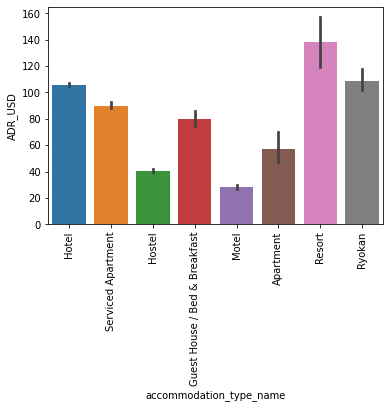

In [916]:
#plt.figure(dpi=200,figsize=(12,4))
sns.barplot(data=cityA,x='accommodation_type_name',y='ADR_USD')

plt.xticks(rotation=90)
plt.show;

## City Statistics

Median Days Booked

In [925]:
all_cities['days_before_checkin'].median()

8.0

In [926]:
# Average ADR
all_cities['ADR_USD'].mean()

148.0930176823937

## Visualisations

<AxesSubplot:xlabel='days_before_checkin', ylabel='ADR_USD'>

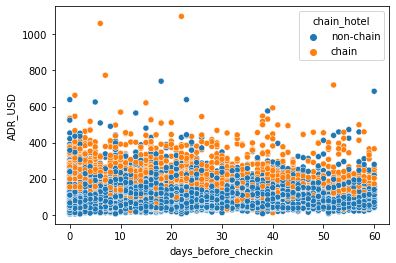

In [931]:
sns.scatterplot(data=cityA,y=cityA['ADR_USD'],x=(cityA['days_before_checkin']),hue='chain_hotel')

<AxesSubplot:xlabel='days_before_checkin', ylabel='ADR_USD'>

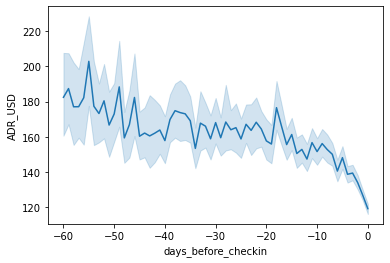

In [954]:
#plt.figure(dpi=200,figsize=(12,4))

#sns.lineplot(data=cityA,x=cityA['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityB,x=cityB['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityC,x=cityC['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityD,x=cityD['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityE,x=cityE['days_before_checkin']*(-1),y='ADR_USD')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin']*(-1),y='ADR_USD')

#plt.labels()

In [956]:
# Group by to calculate mean, same result as lineplot
xx = all_cities.groupby('days_before_checkin').mean()[::-1][['ADR_USD']]
xx[:3]

ADR_USD
days_before_checkin            
60                   182.447690
59                   187.391212
58                   177.072559

<AxesSubplot:xlabel='days_before_checkin', ylabel='ADR_USD'>

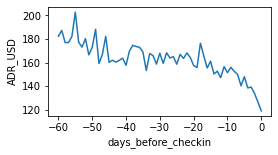

In [958]:
plt.figure(figsize=(4,2))
sns.lineplot(data=xx,x=xx.index*(-1),y='ADR_USD')

In [966]:
cityD_cum.head()

days_before_checkin  bookings  percentage
0                    0       877  100.000000
1                    1       923   91.361308
2                    2       623   82.269504
3                    3       469   76.132782
4                    4       450   71.513002

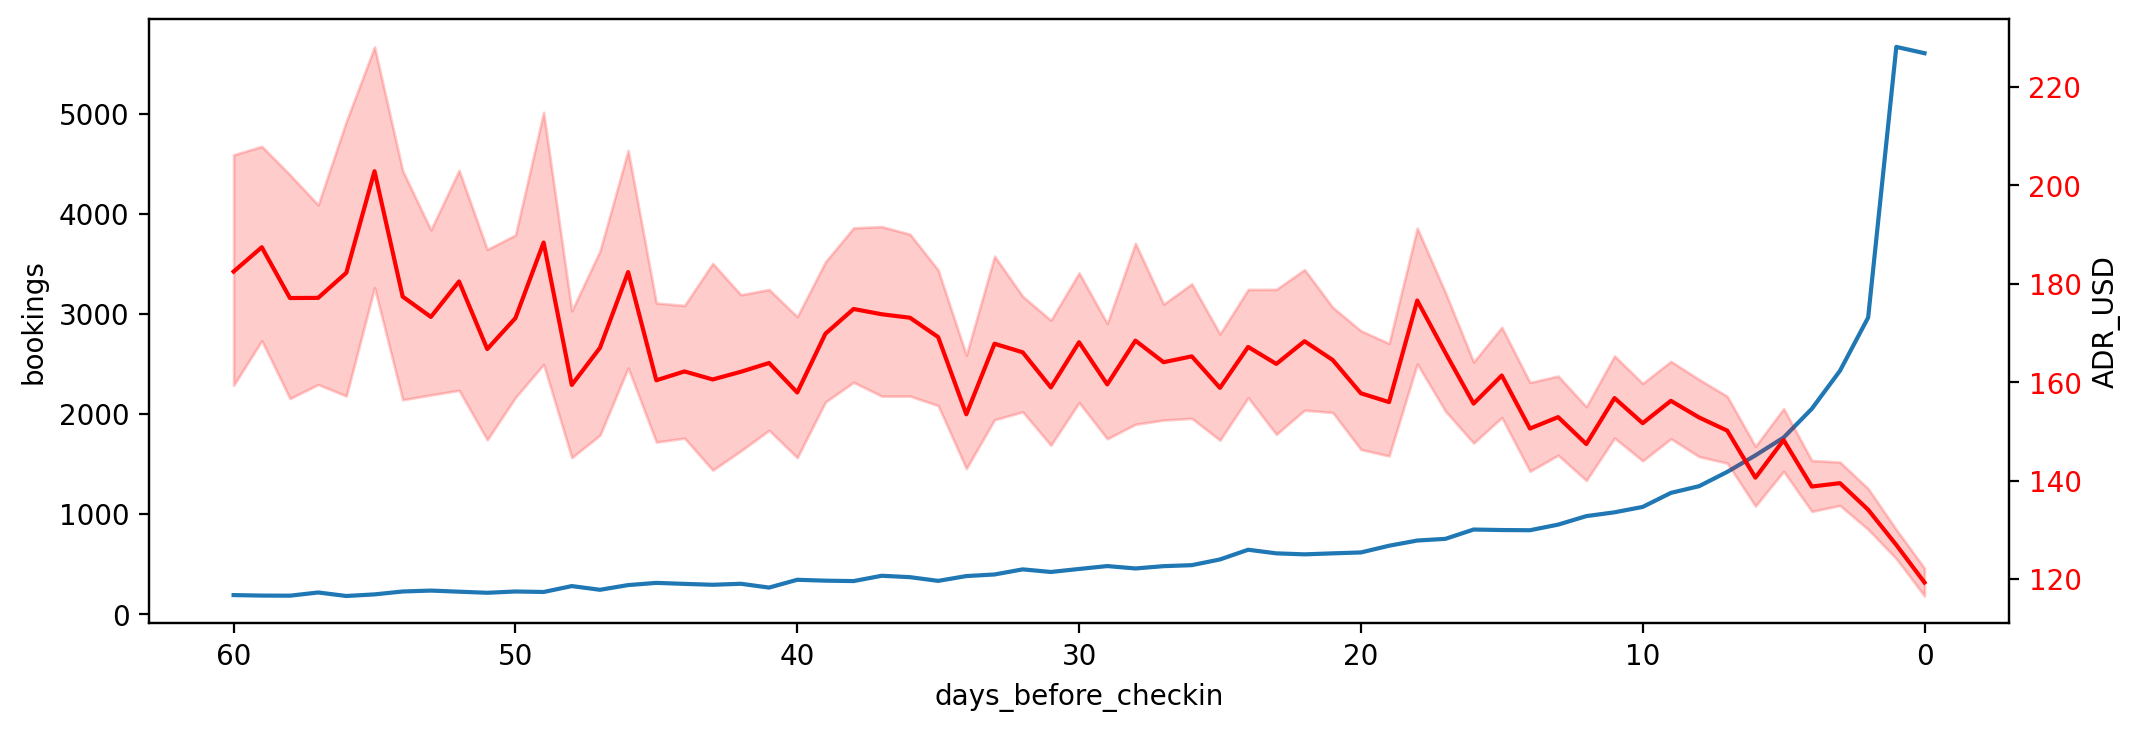

In [998]:
#plt.figure(dpi=200,figsize=(12,4))
fig, ax = plt.subplots(dpi=200,figsize=(12,4))
ax2 = ax.twinx()

#ax.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='red')


sns.lineplot(data = all_cities_cum, x= all_cities_cum['days_before_checkin'],y='bookings',ax=ax)
#sns.lineplot(data = cityD_cum, x= cityD_cum['days_before_checkin'],y='percentage',ax=ax2,color='red')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin'],y='ADR_USD',ax=ax2,color='red')

plt.gca().invert_xaxis()
plt.show();

In [258]:
adfA[adfA['days_booked']>0].info() #check non null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22366 entries, 0 to 22365
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  22366 non-null  float64       
 1   hotel_id                 22366 non-null  int64         
 2   city_id                  22366 non-null  int64         
 3   star_rating              22366 non-null  float64       
 4   accommadation_type_name  22366 non-null  object        
 5   chain_hotel              22366 non-null  object        
 6   booking_date             22366 non-null  datetime64[ns]
 7   checkin_date             22366 non-null  datetime64[ns]
 8   checkout_date            22366 non-null  datetime64[ns]
 9   days_before_checking     22366 non-null  int64         
 10  days_booked              22366 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(4), object(2)
memory usage: 2.0+ MB


In [260]:
adfA.head()

ADR_USD  hotel_id  city_id  star_rating accommadation_type_name  \
0    71.06    297388     9395          2.5                   Hotel   
1    76.56    298322     9395          3.0                   Hotel   
2   153.88   2313076     9395          5.0                   Hotel   
3   126.60   2240838     9395          3.5                   Hotel   
4   115.08   2240838     9395          3.5                   Hotel   

  chain_hotel booking_date checkin_date checkout_date  days_before_checking  \
0   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
1   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
2       chain   2016-08-02   2016-10-01    2016-10-02                    60   
3   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   
4   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   

   days_booked  
0            1  
1            1  
2            1  
3            1  
4            1

In [263]:
adfA[adfA['days_booked']>1].count()

ADR_USD                    10416
hotel_id                   10416
city_id                    10416
star_rating                10416
accommadation_type_name    10416
chain_hotel                10416
booking_date               10416
checkin_date               10416
checkout_date              10416
days_before_checking       10416
days_booked                10416
dtype: int64

In [266]:
adfA['days_booked'].count()

22366

<AxesSubplot:xlabel='days_booked', ylabel='Count'>

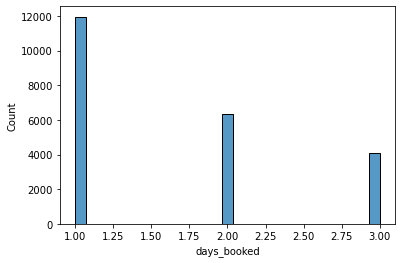

In [269]:
sns.histplot(data=adfA['days_booked'])

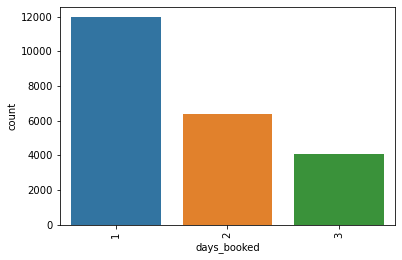

In [289]:
#plt.figure(dpi=200,figsize=(12,4))
sns.countplot(data=adfA,x='days_booked')
plt.xticks(rotation=90)
plt.show;

<AxesSubplot:xlabel='star_rating', ylabel='days_booked'>

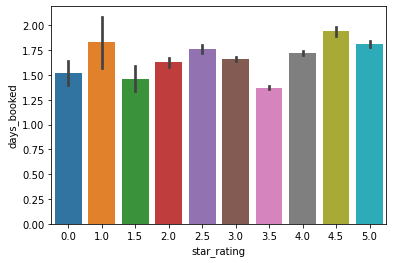

In [278]:
sns.barplot(data=adfA, y='days_booked',x='star_rating')

In [ ]:
sns.displot(data=df,x='salary',bins=10,kde=True,rug=True)
sns.kdeplot(data=df,x='salary')
sns.countplot()

In [ ]:
#DO NOT USE DISTPLOT -deprecated

sns.set(style='darkgrid') #whitegrid, white,dark,tick - high level cmd, set for whole notebook
sns.displot(data=df,x='salary',bins=10,color='red',edgecolor='blue'
           ,lw=1.5,ls='--')

In [ ]:
sns.scatterplot(x='salary',y='sales',data=df,hue='level of education',
                palette = 'Dark2')

<AxesSubplot:xlabel='star_rating', ylabel='count'>

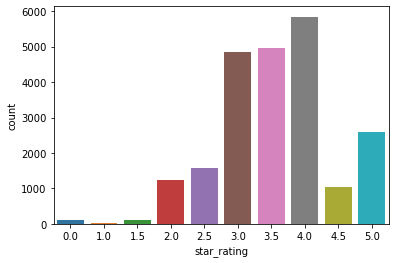

In [280]:
sns.countplot(data=adfA,x='star_rating')

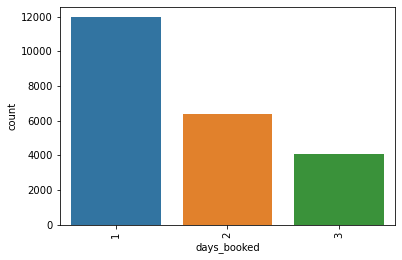

In [288]:
#plt.figure(dpi=200,figsize=(12,4))
sns.countplot(data=adfA,x='days_booked')
plt.xticks(rotation=90)
plt.show;

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

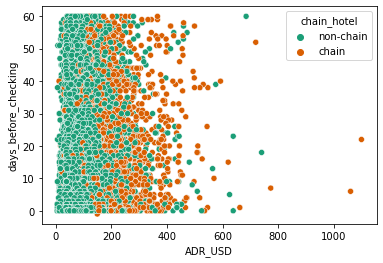

In [305]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=adfA,hue='chain_hotel',
                palette = 'Dark2')

In [275]:
adfA.head()

ADR_USD  hotel_id  city_id  star_rating accommadation_type_name  \
0    71.06    297388     9395          2.5                   Hotel   
1    76.56    298322     9395          3.0                   Hotel   
2   153.88   2313076     9395          5.0                   Hotel   
3   126.60   2240838     9395          3.5                   Hotel   
4   115.08   2240838     9395          3.5                   Hotel   

  chain_hotel booking_date checkin_date checkout_date  days_before_checking  \
0   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
1   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
2       chain   2016-08-02   2016-10-01    2016-10-02                    60   
3   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   
4   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   

   days_booked  
0            1  
1            1  
2            1  
3            1  
4            1

<AxesSubplot:xlabel='days_before_checking', ylabel='ADR_USD'>

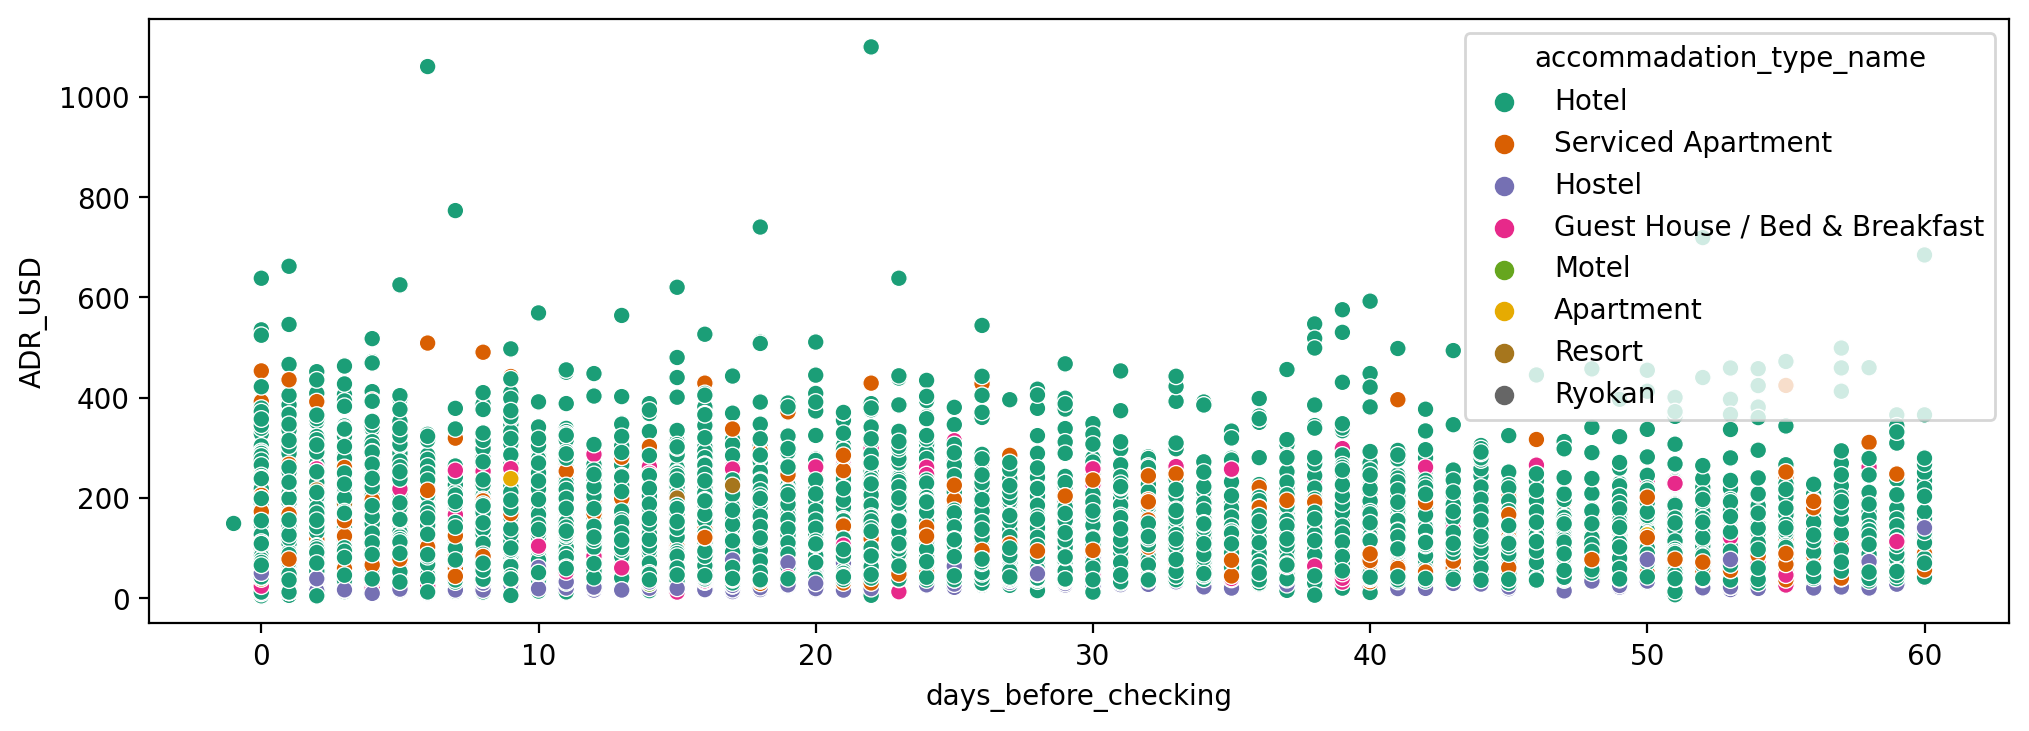

In [307]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='days_before_checking',y='ADR_USD',data=adfA,hue='accommadation_type_name',
                palette = 'Dark2')

In [301]:
adfA[['chain_hotel','ADR_USD']]

chain_hotel  ADR_USD
0       non-chain    71.06
1       non-chain    76.56
2           chain   153.88
3       non-chain   126.60
4       non-chain   115.08
...           ...      ...
22361   non-chain   357.34
22362   non-chain    71.24
22363   non-chain    65.66
22364   non-chain   240.00
22365   non-chain   238.42

[22366 rows x 2 columns]

In [310]:
adfA['revenue'] = adfA['days_booked'] * adfA['ADR_USD']

In [319]:
adfA['revenue'].sum()

3897959.4610476173

In [318]:
(adfA['days_booked'] * adfA['ADR_USD'].mean()).sum()

3703334.642629536

In [311]:
adfA.head()

ADR_USD  hotel_id  city_id  star_rating accommadation_type_name  \
0    71.06    297388     9395          2.5                   Hotel   
1    76.56    298322     9395          3.0                   Hotel   
2   153.88   2313076     9395          5.0                   Hotel   
3   126.60   2240838     9395          3.5                   Hotel   
4   115.08   2240838     9395          3.5                   Hotel   

  chain_hotel booking_date checkin_date checkout_date  days_before_checking  \
0   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
1   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
2       chain   2016-08-02   2016-10-01    2016-10-02                    60   
3   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   
4   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   

   days_booked  revenue  
0            1    71.06  
1            1    76.56  
2            1   153.88  
3            1   126.60  
4            1   115.08

In [325]:
(adfA.groupby('star_rating').mean()['ADR_USD']).reset_index()

star_rating     ADR_USD
0          0.0   52.662887
1          1.0   42.059905
2          1.5   29.190133
3          2.0   38.501803
4          2.5   66.753403
5          3.0   72.565586
6          3.5   61.807264
7          4.0  129.544933
8          4.5  152.972898
9          5.0  196.606296

In [ ]:
df.loc[df['First Season'] > 1990, 'First Season'] = 1
df['c1'].loc[df['c1'] == 'Value'] = 10

def add_new_rev(num):
    return 

In [326]:
aa =(adfA.groupby('star_rating').mean()['ADR_USD']).reset_index()['ADR_USD']

In [331]:
aa

0     52.662887
1     42.059905
2     29.190133
3     38.501803
4     66.753403
5     72.565586
6     61.807264
7    129.544933
8    152.972898
9    196.606296
Name: ADR_USD, dtype: float64

In [332]:
aaa = pd.DataFrame(aa)

In [335]:
aaa.dtypes

ADR_USD    float64
dtype: object

In [346]:
type([])

list

In [364]:
conditions = [
    (adfA['star_rating'] == 0.0),
    (adfA['star_rating'] == 1.0),
    (adfA['star_rating'] == 1.5),
    (adfA['star_rating'] == 2.0),
    (adfA['star_rating'] == 2.5),
    (adfA['star_rating'] == 3.0),
    (adfA['star_rating'] == 3.5),
    (adfA['star_rating'] == 4.0),
    (adfA['star_rating'] == 4.5),
    (adfA['star_rating'] == 5.0)
]

values = np.array(aa) #['<20 years old', '20-39 years old', '40-59 years old', '60+ years old']



In [365]:
values

array([ 52.6628869 ,  42.05990476,  29.19013333,  38.50180299,
        66.75340273,  72.56558597,  61.80726438, 129.54493324,
       152.97289768, 196.60629588])

In [366]:
adfA['ADR2'] = np.select(conditions, values)

In [367]:
adfA

ADR_USD  hotel_id  city_id  star_rating accommadation_type_name  \
0        71.06    297388     9395          2.5                   Hotel   
1        76.56    298322     9395          3.0                   Hotel   
2       153.88   2313076     9395          5.0                   Hotel   
3       126.60   2240838     9395          3.5                   Hotel   
4       115.08   2240838     9395          3.5                   Hotel   
...        ...       ...      ...          ...                     ...   
22361   357.34    608654     9395          4.5                   Hotel   
22362    71.24    218518     9395          3.5                   Hotel   
22363    65.66    152820     9395          4.0                   Hotel   
22364   240.00    257678     9395          4.0                   Hotel   
22365   238.42     21308     9395          4.0                   Hotel   

      chain_hotel booking_date checkin_date checkout_date  \
0       non-chain   2016-08-02   2016-10-01    2016-10-02   
1       non-chain   2016-08-02   2016-10-01    2016-10-02   
2           chain   2016-08-02   2016-10-01    2016-10-02   
3       non-chain   2016-08-04   2016-10-02    2016-10-03   
4       non-chain   2016-08-04   2016-10-02    2016-10-03   
...           ...          ...          ...           ...   
22361   non-chain   2016-12-31   2016-12-31    2017-01-01   
22362   non-chain   2016-12-31   2016-12-31    2017-01-02   
22363   non-chain   2016-12-31   2016-12-31    2017-01-01   
22364   non-chain   2016-12-31   2016-12-31    2017-01-01   
22365   non-chain   2016-12-31   2016-12-31    2017-01-01   

       days_before_checking  days_booked  revenue        ADR2  
0                        60            1    71.06   66.753403  
1                        60            1    76.56   72.565586  
2                        60            1   153.88  196.606296  
3                        59            1   126.60   61.807264  
4                        59            1   115.08   61.807264  
...                     ...          ...      ...         ...  
22361                     0            1   357.34  152.972898  
22362                     0            2   142.48   61.807264  
22363                     0            1    65.66  129.544933  
22364                     0            1   240.00  129.544933  
22365                     0            1   238.42  129.544933  

[22366 rows x 13 columns]

In [368]:
adfA['revenue'].sum()

3897959.4610476173

In [369]:
(adfA['days_booked'] * adfA['ADR2'].mean()).sum()

3703334.6426292253

In [314]:
adfA['revenue']-adfA['ADR_USD'].mean()

0        -29.448458
1        -23.948458
2         53.371542
3         26.091542
4         14.571542
            ...    
22361    256.831542
22362     41.971542
22363    -34.848458
22364    139.491542
22365    137.911542
Name: revenue, Length: 22366, dtype: float64

<AxesSubplot:xlabel='days_before_checking', ylabel='chain_hotel'>

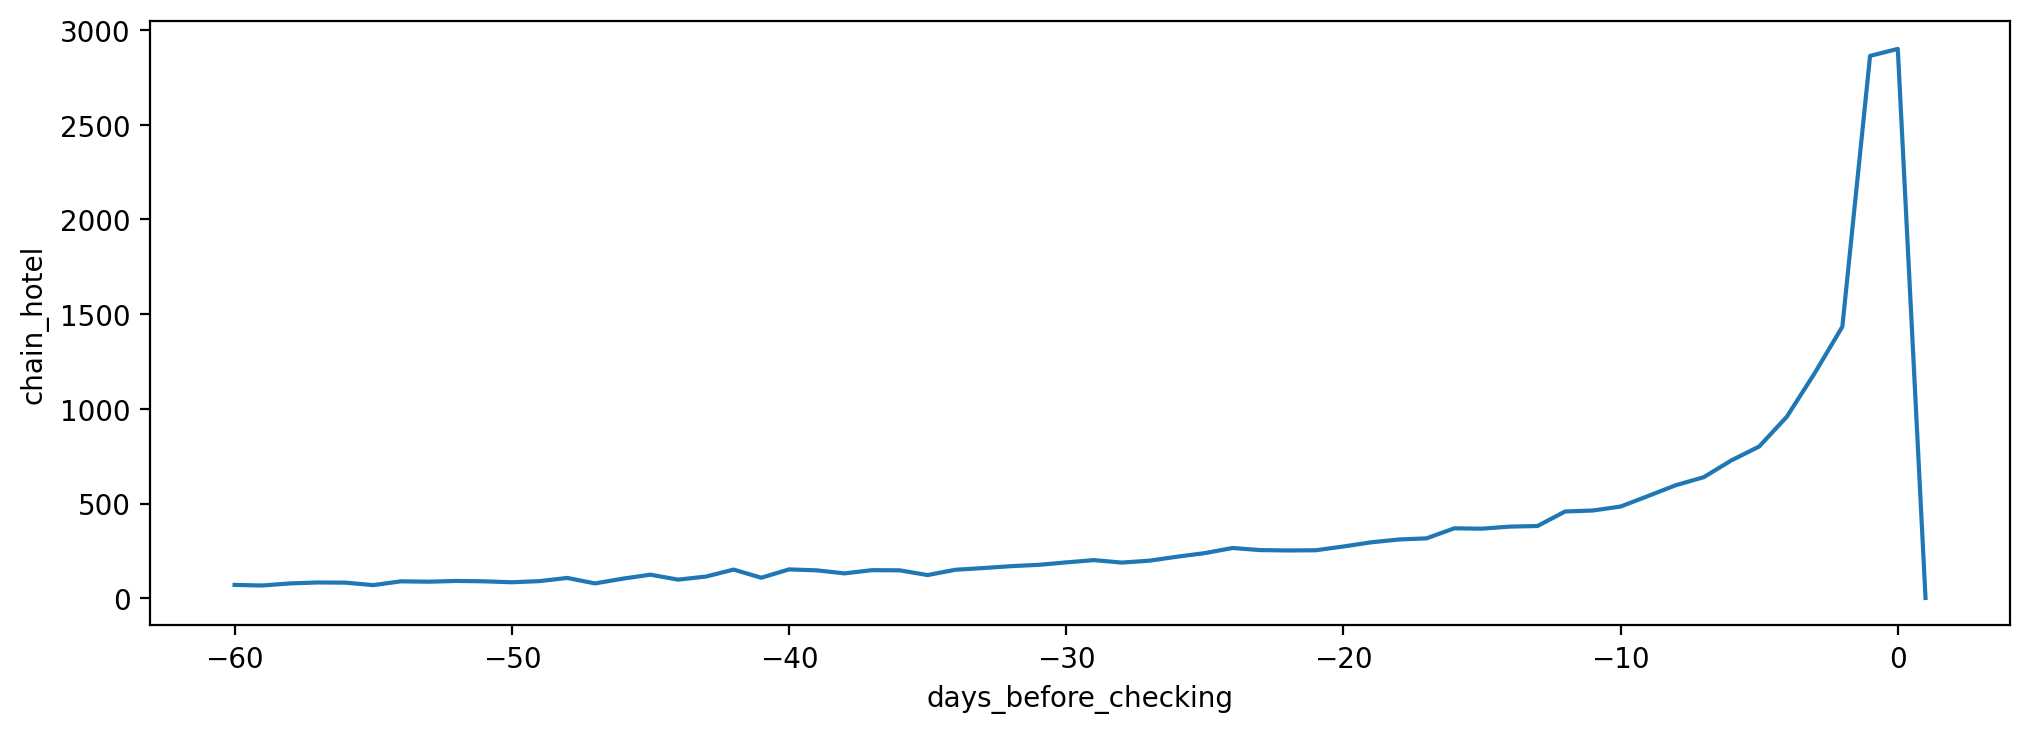

In [312]:
plt.figure(dpi=200,figsize=(12,4))
sns.lineplot(data = df_new, x= df_new['days_before_checking']*(-1),y='chain_hotel')

In [393]:
type(dfA)

pandas.core.frame.DataFrame

In [391]:
dfB

#     ADR_USD  hotel_id  city_id  star_rating  \
0        1   89.860000    861894    17193          3.0   
1        2  459.348000    195300    17193          5.0   
2        3  183.633333       770    17193          4.0   
3        4  191.280000      3644    17193          5.0   
4        5   54.860000   2030338    17193          3.0   
...    ...         ...       ...      ...          ...   
4927  4928   87.246667   3278878    17193          3.0   
4928  4929   96.220000    593004    17193          3.0   
4929  4930  101.840000    496992    17193          4.0   
4930  4931   95.920000   1735158    17193          4.0   
4931  4932  204.670000    592520    17193          4.0   

            accommadation_type_name chain_hotel booking_date checkin_date  \
0                            Resort   non-chain   2016-08-04   2016-10-01   
1                            Resort   non-chain   2016-08-05   2016-10-03   
2                             Hotel       chain   2016-08-07   2016-10-01   
3                            Resort       chain   2016-08-08   2016-10-07   
4                             Hotel   non-chain   2016-08-08   2016-10-02   
...                             ...         ...          ...          ...   
4927                          Hotel   non-chain   2016-12-31   2016-12-31   
4928  Guest House / Bed & Breakfast   non-chain   2016-12-31   2016-12-31   
4929                         Resort   non-chain   2016-12-31   2016-12-31   
4930                          Hotel   non-chain   2016-12-31   2016-12-31   
4931                          Hotel   non-chain   2016-12-31   2016-12-31   

     checkout_date  
0       2016-10-03  
1       2016-10-06  
2       2016-10-04  
3       2016-10-08  
4       2016-10-03  
...            ...  
4927    2017-01-03  
4928    2017-01-01  
4929    2017-01-01  
4930    2017-01-01  
4931    2017-01-02  

[4932 rows x 10 columns]

In [538]:
datasets = [dfA,dfB,dfC,dfD,dfE]
dfall = pd.concat(datasets,ignore_index=True)

In [539]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49064 entries, 0 to 49063
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        49064 non-null  int64         
 1   ADR_USD                  49064 non-null  float64       
 2   hotel_id                 49064 non-null  int64         
 3   city_id                  49064 non-null  int64         
 4   star_rating              49064 non-null  float64       
 5   accommodation_type_name  49064 non-null  object        
 6   chain_hotel              49064 non-null  object        
 7   booking_date             49064 non-null  datetime64[ns]
 8   checkin_date             49064 non-null  datetime64[ns]
 9   checkout_date            49064 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [544]:
dfall['days_before_checking'] = (dfall['checkin_date'] - dfall['booking_date']).dt.days
dfall['days_booked'] = (dfall['checkout_date'] - dfall['checkin_date']).dt.days

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

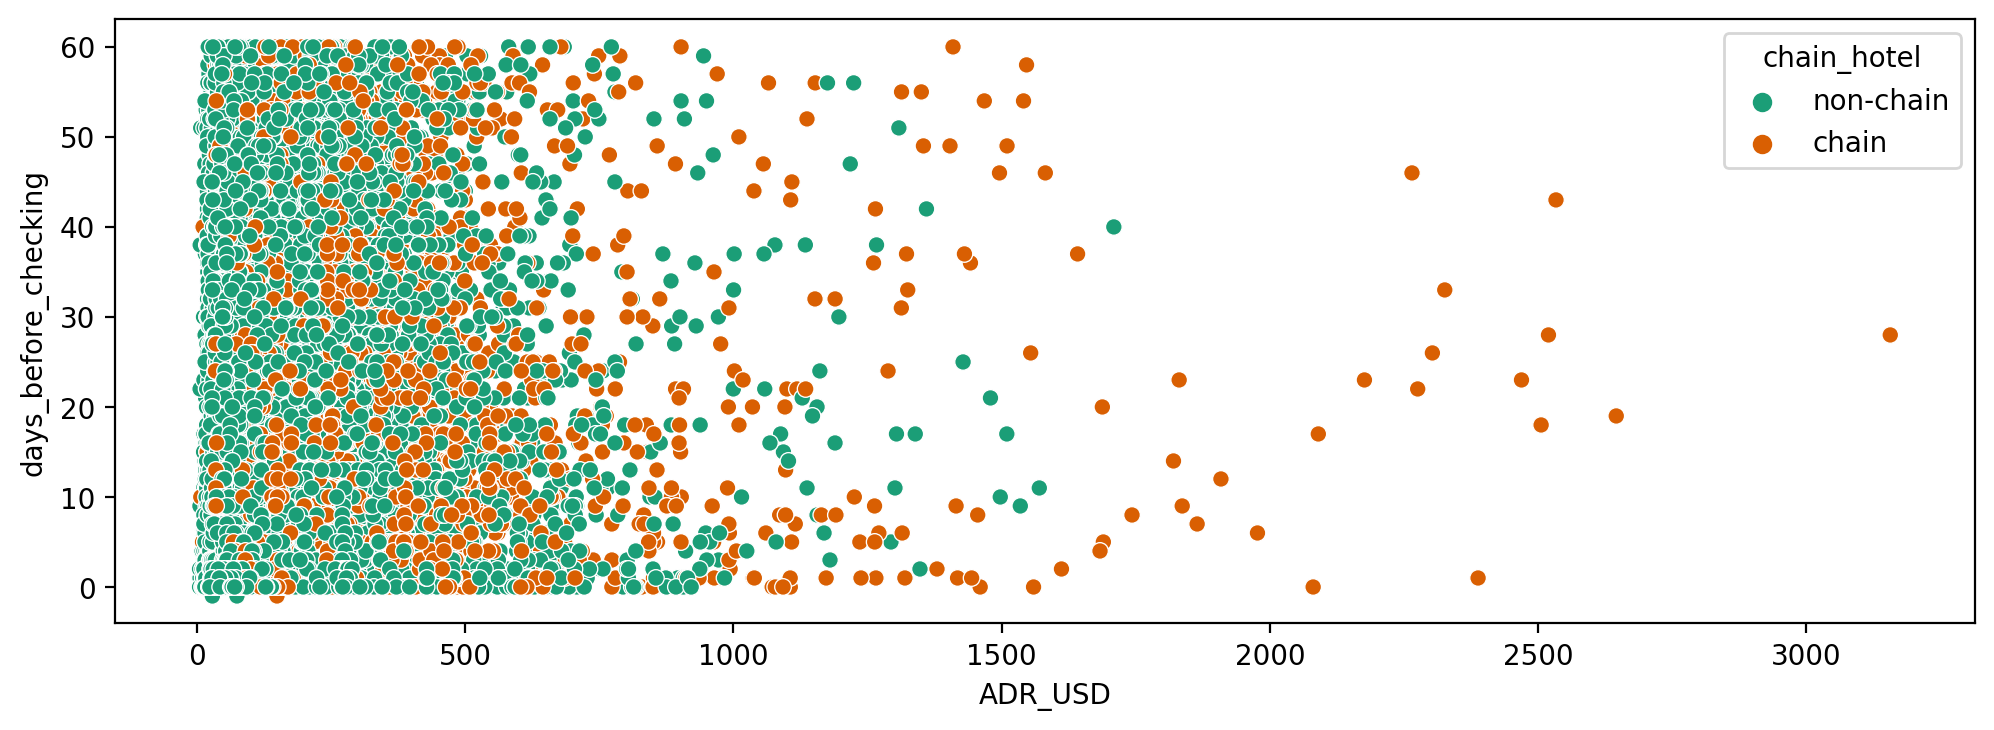

In [545]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=dfall,hue='chain_hotel',
                palette = 'Dark2')

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

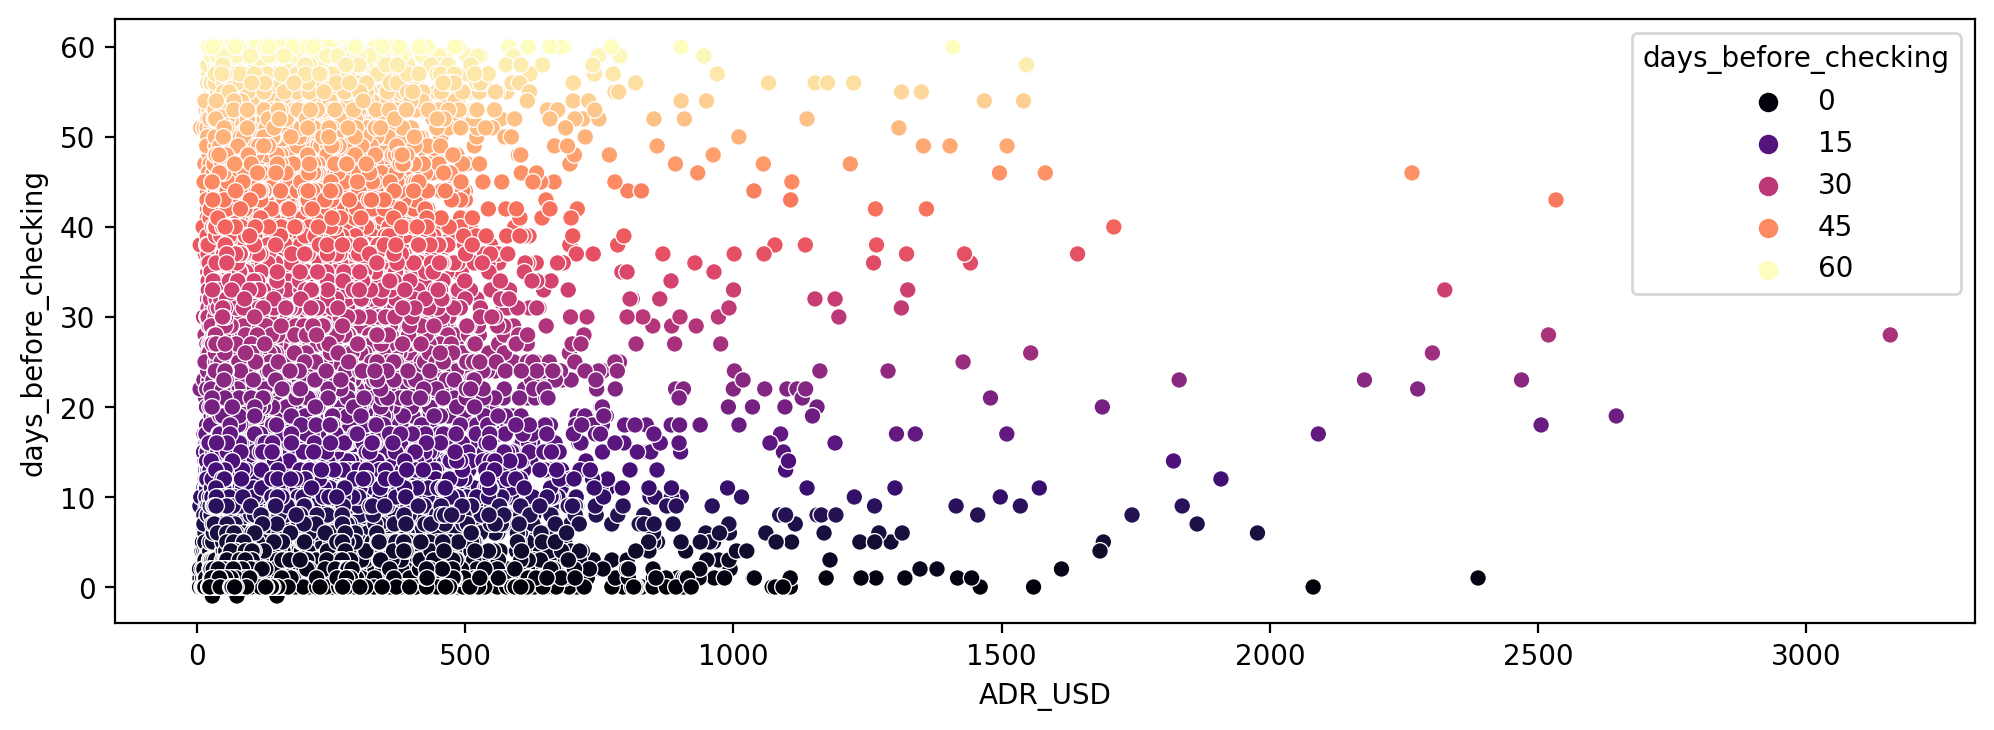

In [436]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=dfall,hue='days_before_checking',
                palette = 'magma')

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

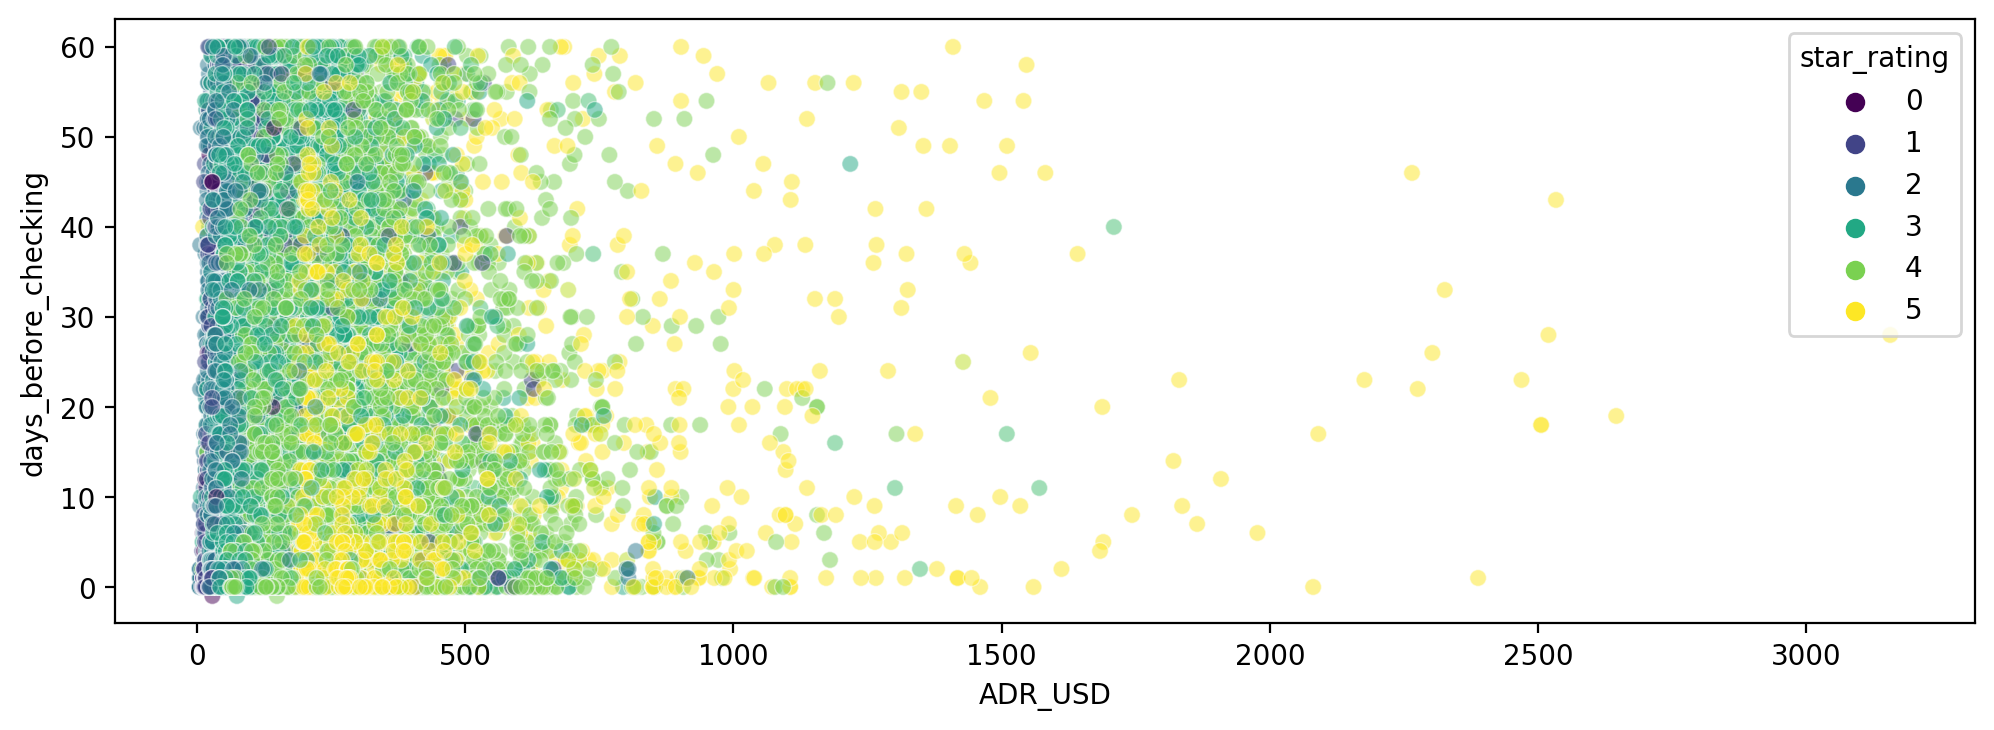

In [569]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=dfall,hue='star_rating',
                palette = 'viridis',alpha=0.5)

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

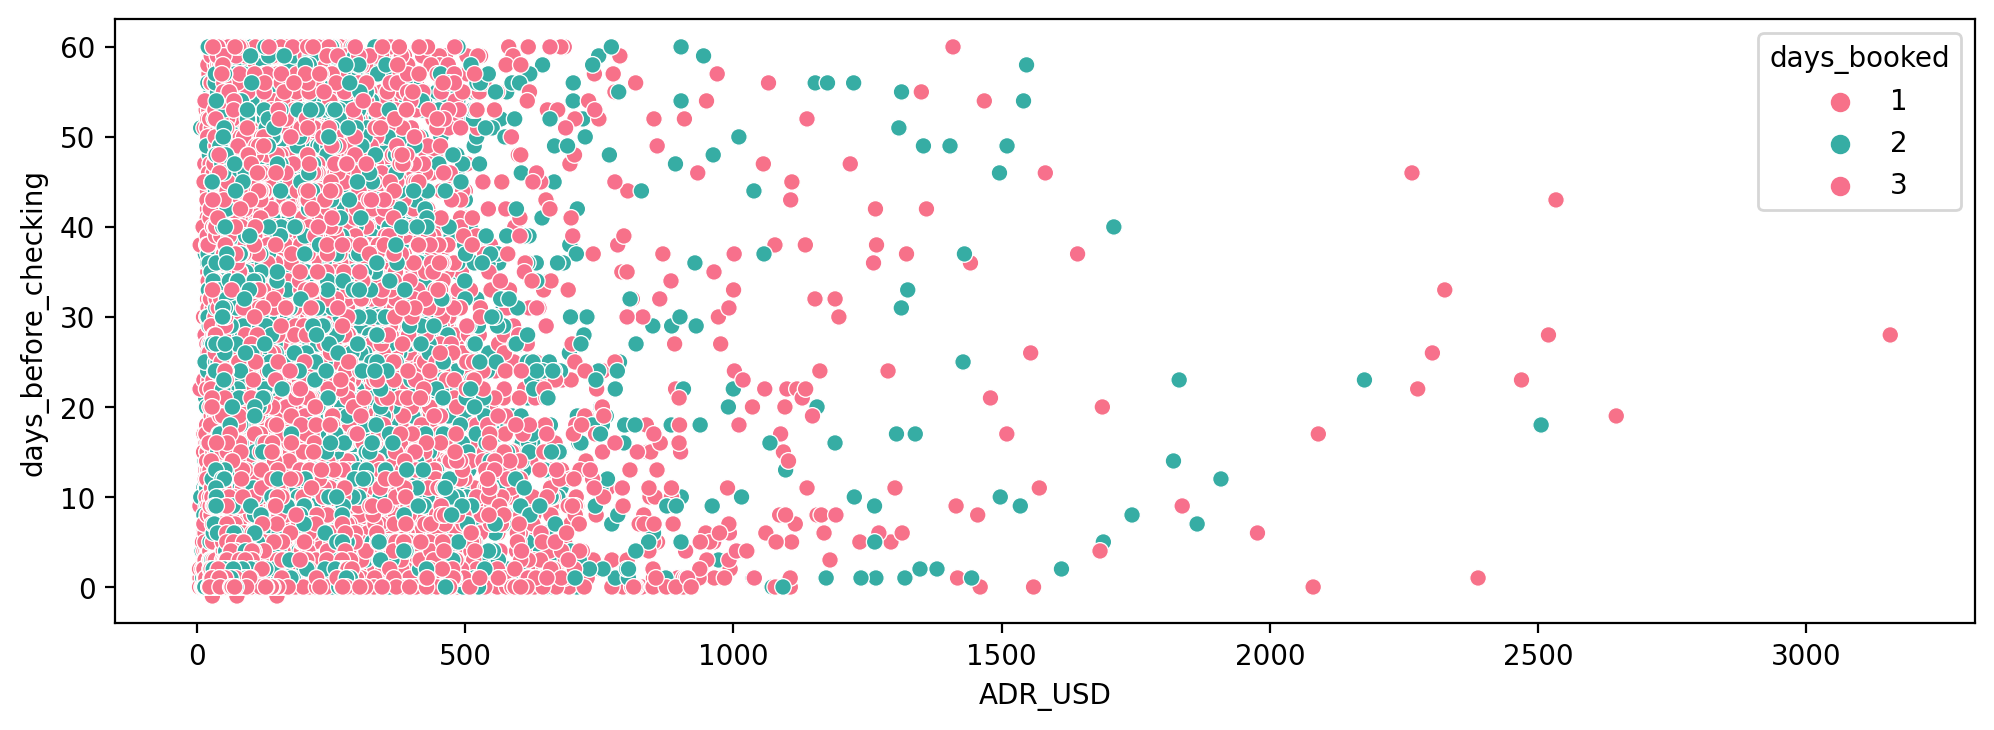

In [570]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=dfall,hue='days_booked',
                palette = 'husl')

### Mostly resorts are booked late

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

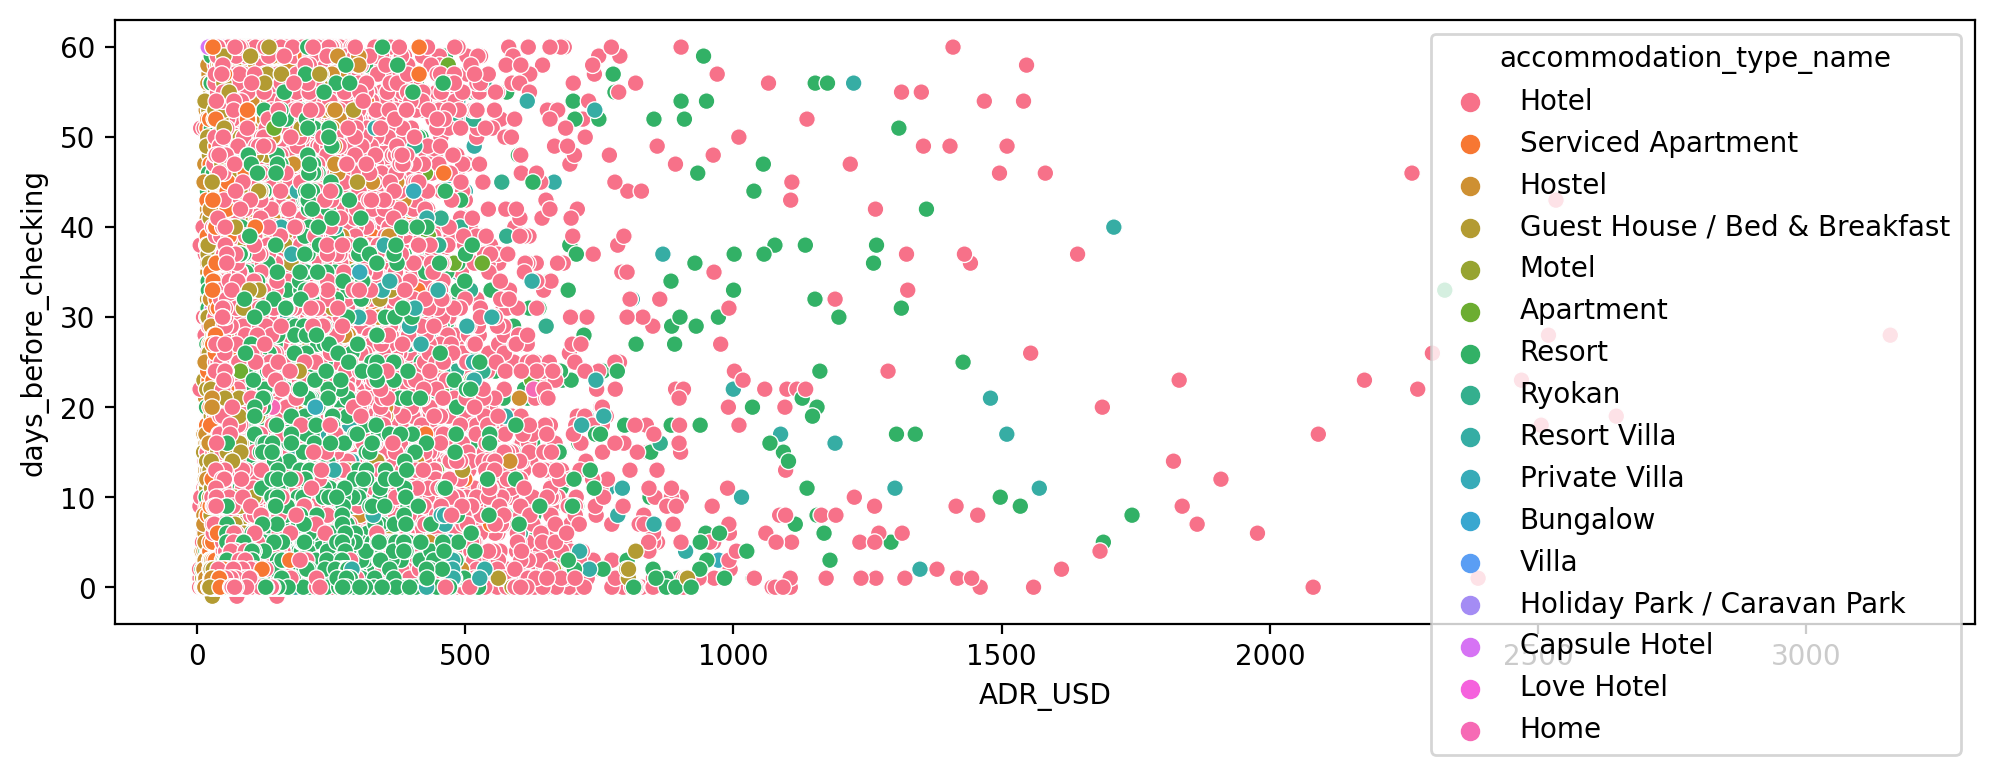

In [512]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=dfall,hue='accommodation_type_name',
                palette = 'husl')

In [504]:
dfall['city_id'].unique()

array([ 9395, 17193,  5085, 16808,  8584], dtype=int64)

<AxesSubplot:xlabel='days_before_checking', ylabel='ADR_USD'>

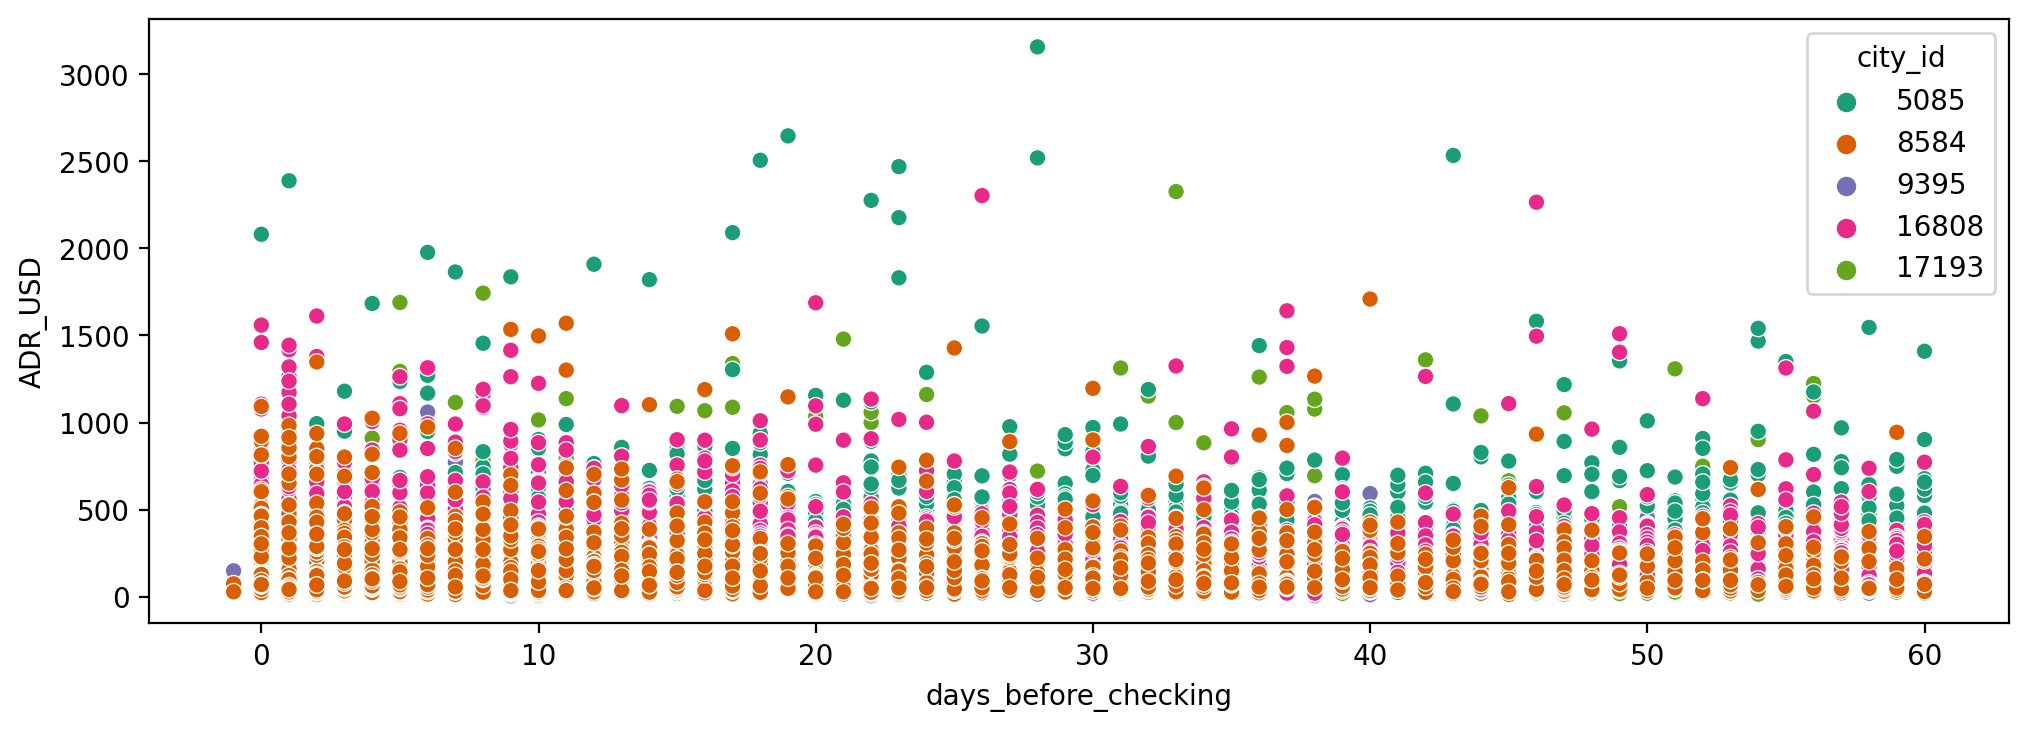

In [456]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(y='ADR_USD',x='days_before_checking',data=dfall,hue='city_id',
                palette = 'Dark2')

In [457]:
#plt.figure(dpi=200,figsize=(12,4))
#sns.scatterplot(y='ADR_USD',x='days_before_checking',data=dfA,hue='city_id',
 #               palette = 'husl')

In [470]:
dfall.groupby(['accommodation_type_name']).sum()[:-1]

#       ADR_USD     hotel_id  \
accommodation_type_name                                               
Apartment                        1228491  4.691803e+04    528352354   
Bungalow                          362643  1.020494e+04    169923310   
Capsule Hotel                    2806050  5.039893e+04    637763152   
Guest House / Bed & Breakfast   14465656  2.365347e+05   3599535860   
Holiday Park / Caravan Park        10354  2.945767e+02      4128322   
Home                               76435  2.722590e+03     40819560   
Hostel                          19826236  2.462795e+05   4253070550   
Hotel                          270831797  5.604299e+06  23840362656   
Love Hotel                         13332  7.003300e+02      7537116   
Motel                             307090  7.578167e+02     50162120   
Private Villa                      43174  6.101340e+03     27911704   
Resort                           9489720  6.732091e+05   2520704518   
Resort Villa                      844851  1.030185e+05    450329736   
Ryokan                            450053  3.242180e+04    101233998   
Serviced Apartment              27781712  2.519281e+05   2631368154   

                                 city_id  star_rating  days_before_checking  \
accommodation_type_name                                                       
Apartment                        1906280        408.5                  3922   
Bungalow                         2432797        332.5                  1609   
Capsule Hotel                    4179870        841.5                 14309   
Guest House / Bed & Breakfast   35517738       4602.0                 37158   
Holiday Park / Caravan Park        51579          8.0                    54   
Home                              215365         13.0                   169   
Hostel                          33779655       5786.5                 43956   
Hotel                          382524554     126101.0                522662   
Love Hotel                         15255          5.0                    54   
Motel                             253665          0.0                   241   
Private Villa                     283647         66.5                   277   
Resort                          46459859      14229.5                 46590   
Resort Villa                     5981939       1395.5                  6968   
Ryokan                            562545        287.0                  2331   
Serviced Apartment              27289194       9251.0                 32573   

                               days_booked  
accommodation_type_name                     
Apartment                              449  
Bungalow                               276  
Capsule Hotel                         1196  
Guest House / Bed & Breakfast         4669  
Holiday Park / Caravan Park              6  
Home                                    17  
Hostel                                4545  
Hotel                                59640  
Love Hotel                               4  
Motel                                   35  
Private Villa                           31  
Resort                                5745  
Resort Villa                           695  
Ryokan                                 150  
Serviced Apartment                    4785

In [471]:
dfall['accommodation_type_name'].value_counts()

Hotel                            35441
Resort                            3525
Serviced Apartment                2797
Hostel                            2774
Guest House / Bed & Breakfast     2758
Capsule Hotel                      822
Resort Villa                       397
Apartment                          239
Bungalow                           142
Ryokan                             103
Motel                               27
Private Villa                       18
Home                                14
Holiday Park / Caravan Park          3
Love Hotel                           3
Villa                                1
Name: accommodation_type_name, dtype: int64

In [485]:
options = ['Bungalow','Ryokan','Motel','Private Villa','Home','Holiday Park / Caravan Park','Love Hotel','Villa']
#dfall[(dfall['accommodation_type_name'] == 'Bungalow' | 'Motel')]

## WHAT IS THE PERCENTAGE OF DATA I AM REMOVING???????????????????????????????????????????

In [483]:
dfall[~dfall['accommodation_type_name'].isin(options)]

#     ADR_USD  hotel_id  city_id  star_rating  \
0        1   71.060000    297388     9395          2.5   
1        2   76.560000    298322     9395          3.0   
2        3  153.880000   2313076     9395          5.0   
3        4  126.600000   2240838     9395          3.5   
4        5  115.080000   2240838     9395          3.5   
...    ...         ...       ...      ...          ...   
4812  4813   72.580000    130890     8584          4.0   
4813  4814   70.020000    130890     8584          4.0   
4814  4815  921.260000     21720     8584          5.0   
4815  4816  345.086667     21720     8584          5.0   
4816  4817  303.520000     21720     8584          5.0   

     accommodation_type_name chain_hotel booking_date checkin_date  \
0                      Hotel   non-chain   2016-08-02   2016-10-01   
1                      Hotel   non-chain   2016-08-02   2016-10-01   
2                      Hotel       chain   2016-08-02   2016-10-01   
3                      Hotel   non-chain   2016-08-04   2016-10-02   
4                      Hotel   non-chain   2016-08-04   2016-10-02   
...                      ...         ...          ...          ...   
4812                   Hotel   non-chain   2016-12-31   2016-12-31   
4813                   Hotel   non-chain   2016-12-31   2016-12-31   
4814                  Resort   non-chain   2016-12-31   2016-12-31   
4815                  Resort   non-chain   2016-12-31   2016-12-31   
4816                  Resort   non-chain   2016-12-31   2016-12-31   

     checkout_date  days_before_checking  days_booked  
0       2016-10-02                    60            1  
1       2016-10-02                    60            1  
2       2016-10-02                    60            1  
3       2016-10-03                    59            1  
4       2016-10-03                    59            1  
...            ...                   ...          ...  
4812    2017-01-02                     0            2  
4813    2017-01-01                     0            1  
4814    2017-01-01                     0            1  
4815    2017-01-03                     0            3  
4816    2017-01-01                     0            1  

[48856 rows x 12 columns]

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

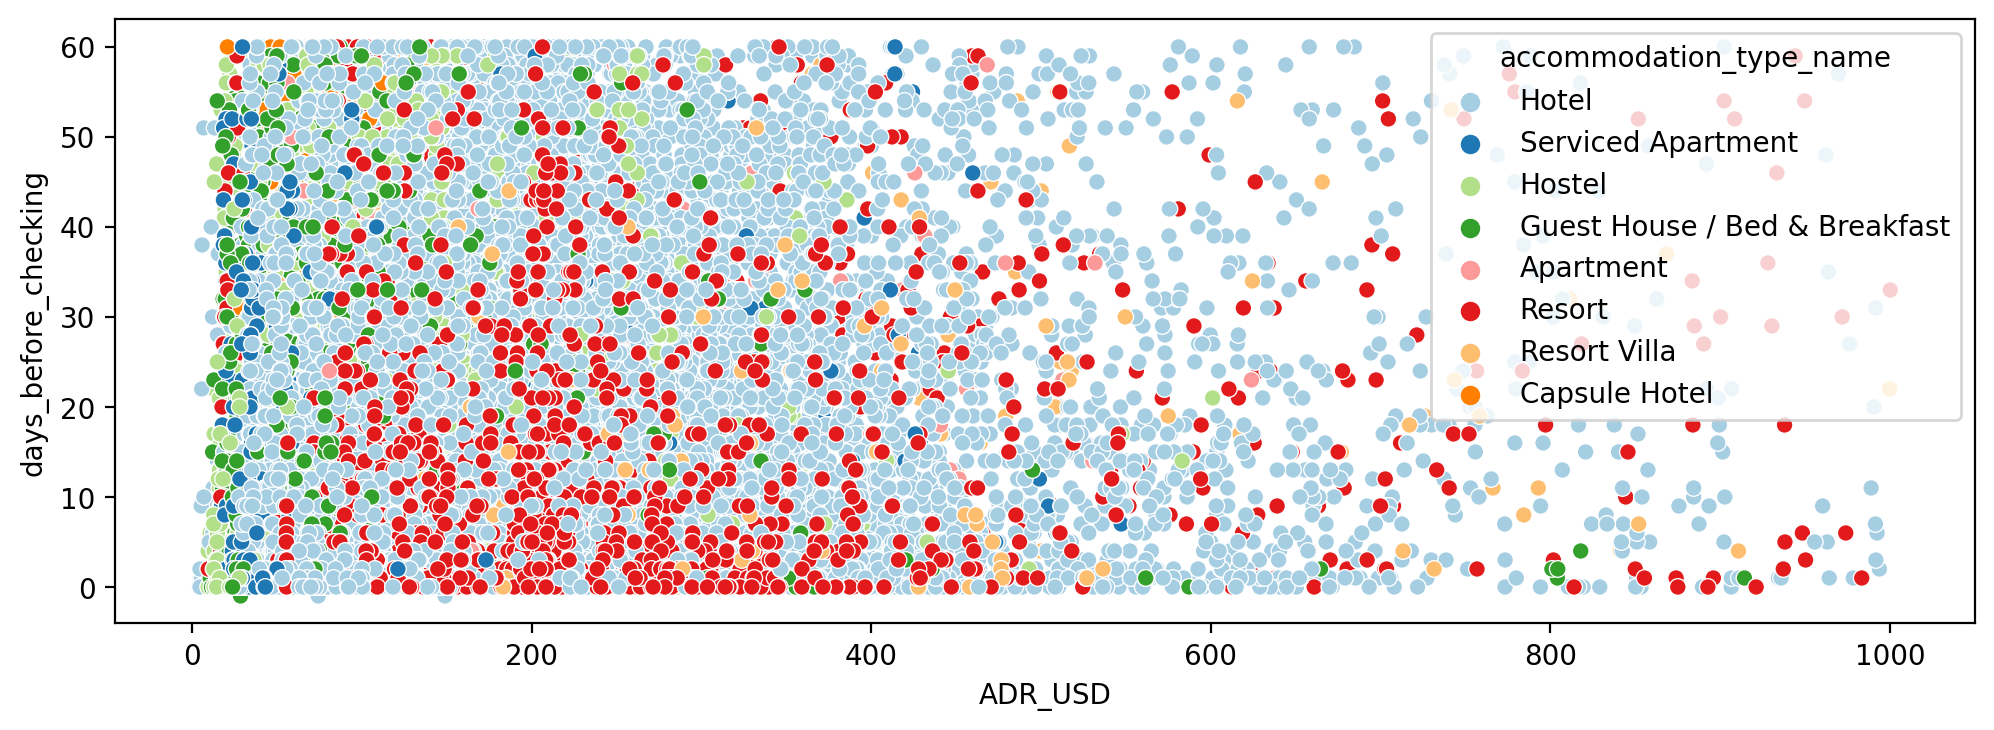

In [500]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=dfall2[~dfall2['accommodation_type_name'].isin(options)],hue='accommodation_type_name',
                palette = 'Paired')

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checking'>

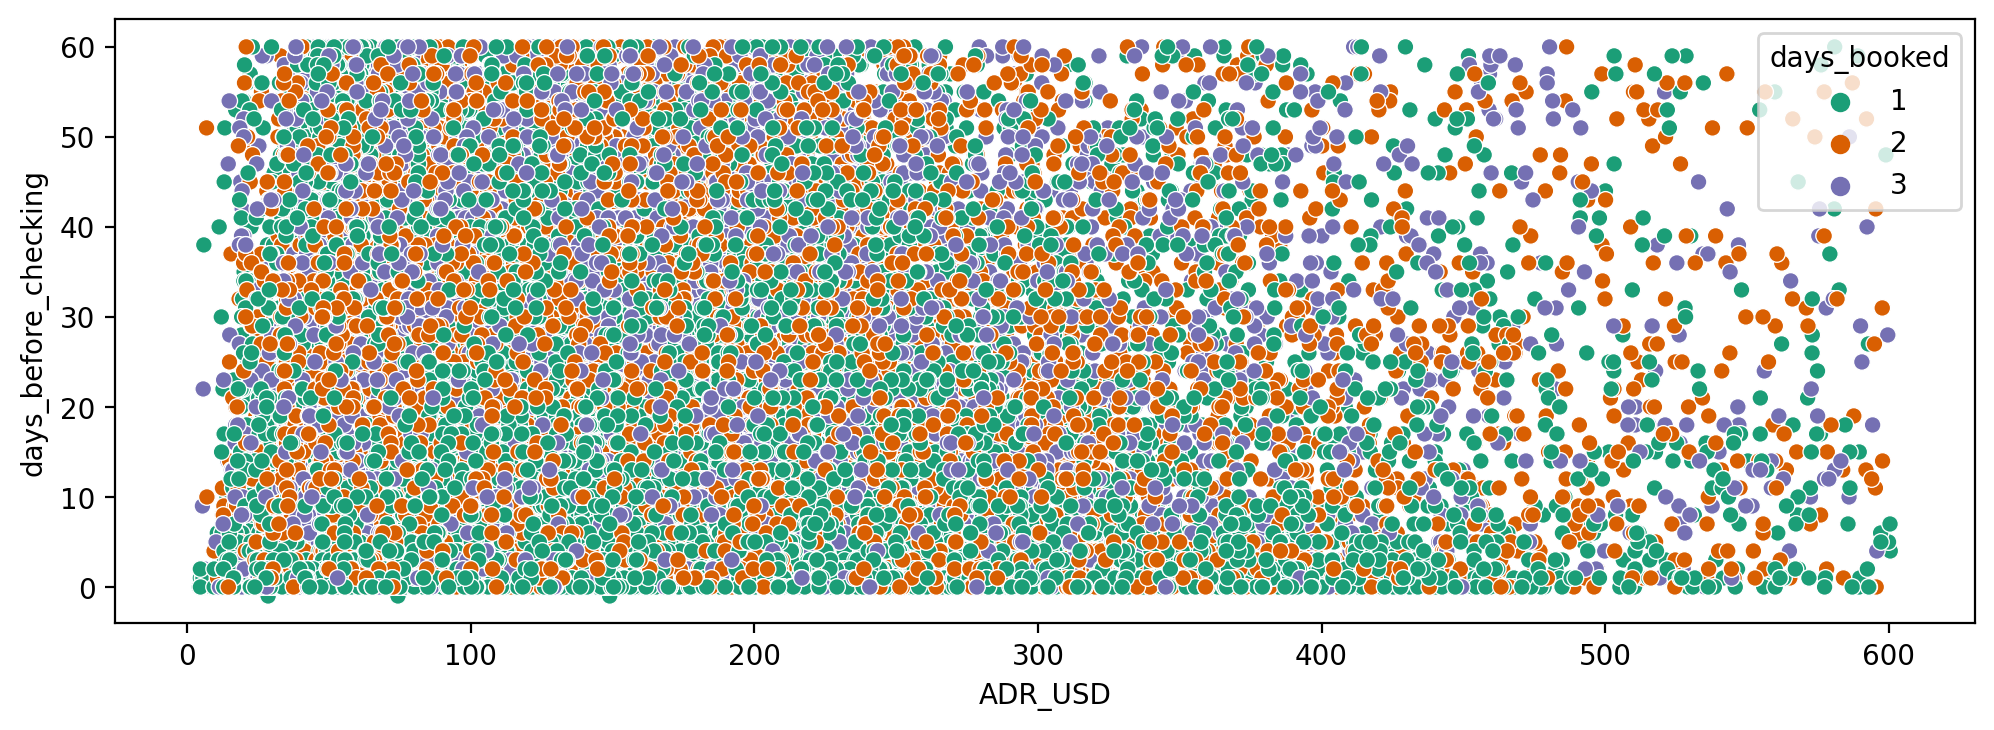

In [579]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checking',data=dfall[dfall['ADR_USD']<601],hue='days_booked',
                palette = 'Dark2')

# what percentage of 1 day bookers book last 10 days?

In [496]:
dfall2 = dfall[dfall['ADR_USD']<1001]

In [490]:
dfall.groupby('accommodation_type_name').mean().sort_values('days_before_checking')

#     ADR_USD      hotel_id  \
accommodation_type_name                                                 
Villa                           1129.000000   54.290000  1.646188e+06   
Motel                          11373.703704   28.067284  1.857856e+06   
Bungalow                        2553.823944   71.865798  1.196643e+06   
Serviced Apartment              9932.682159   90.070825  9.407823e+05   
Home                            5459.642857  194.470714  2.915683e+06   
Resort                          2692.119149  190.981311  7.150935e+05   
Guest House / Bed & Breakfast   5244.980421   85.763141  1.305125e+06   
Hotel                           7641.765103  158.130377  6.726775e+05   
Private Villa                   2398.555556  338.963333  1.550650e+06   
Hostel                          7147.165105   88.781364  1.533191e+06   
Apartment                       5140.129707  196.309749  2.210679e+06   
Capsule Hotel                   3413.686131   61.312571  7.758676e+05   
Resort Villa                    2128.088161  259.492543  1.134332e+06   
Holiday Park / Caravan Park     3451.333333   98.192222  1.376107e+06   
Love Hotel                      4444.000000  233.443333  2.512372e+06   
Ryokan                          4369.446602  314.774790  9.828543e+05   

                                    city_id  star_rating  \
accommodation_type_name                                    
Villa                          17193.000000     1.000000   
Motel                           9395.000000     0.000000   
Bungalow                       17132.373239     2.341549   
Serviced Apartment              9756.594208     3.307472   
Home                           15383.214286     0.928571   
Resort                         13180.101844     4.036738   
Guest House / Bed & Breakfast  12878.077592     1.668600   
Hotel                          10793.277673     3.558054   
Private Villa                  15758.166667     3.694444   
Hostel                         12177.236842     2.085977   
Apartment                       7976.066946     1.709205   
Capsule Hotel                   5085.000000     1.023723   
Resort Villa                   15067.856423     3.515113   
Holiday Park / Caravan Park    17193.000000     2.666667   
Love Hotel                      5085.000000     1.666667   
Ryokan                          5461.601942     2.786408   

                               days_before_checking  days_booked  
accommodation_type_name                                           
Villa                                      1.000000     2.000000  
Motel                                      8.925926     1.296296  
Bungalow                                  11.330986     1.943662  
Serviced Apartment                        11.645692     1.710762  
Home                                      12.071429     1.214286  
Resort                                    13.217021     1.629787  
Guest House / Bed & Breakfast             13.472806     1.692893  
Hotel                                     14.747383     1.682797  
Private Villa                             15.388889     1.722222  
Hostel                                    15.845710     1.638428  
Apartment                                 16.410042     1.878661  
Capsule Hotel                             17.407543     1.454988  
Resort Villa                              17.551637     1.750630  
Holiday Park / Caravan Park               18.000000     2.000000  
Love Hotel                                18.000000     1.333333  
Ryokan                                    22.631068     1.456311

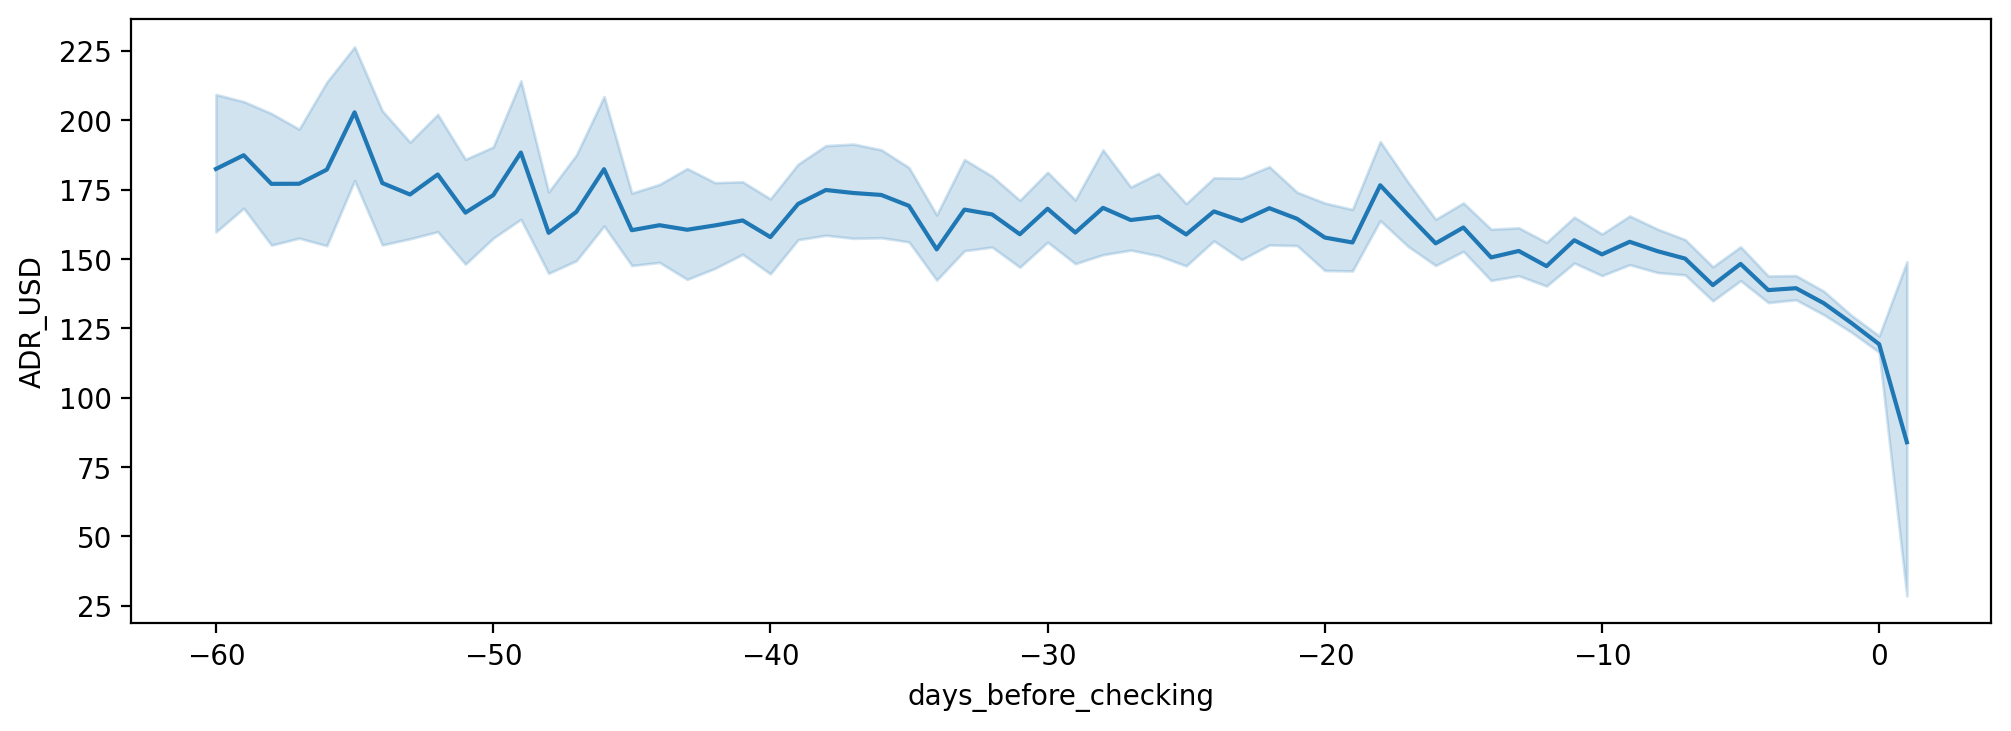

In [536]:
plt.figure(dpi=200,figsize=(12,4))

sns.lineplot(data=dfall,x=dfall['days_before_checking']*(-1),y='ADR_USD');

<AxesSubplot:xlabel='days_before_checking', ylabel='ADR_USD'>

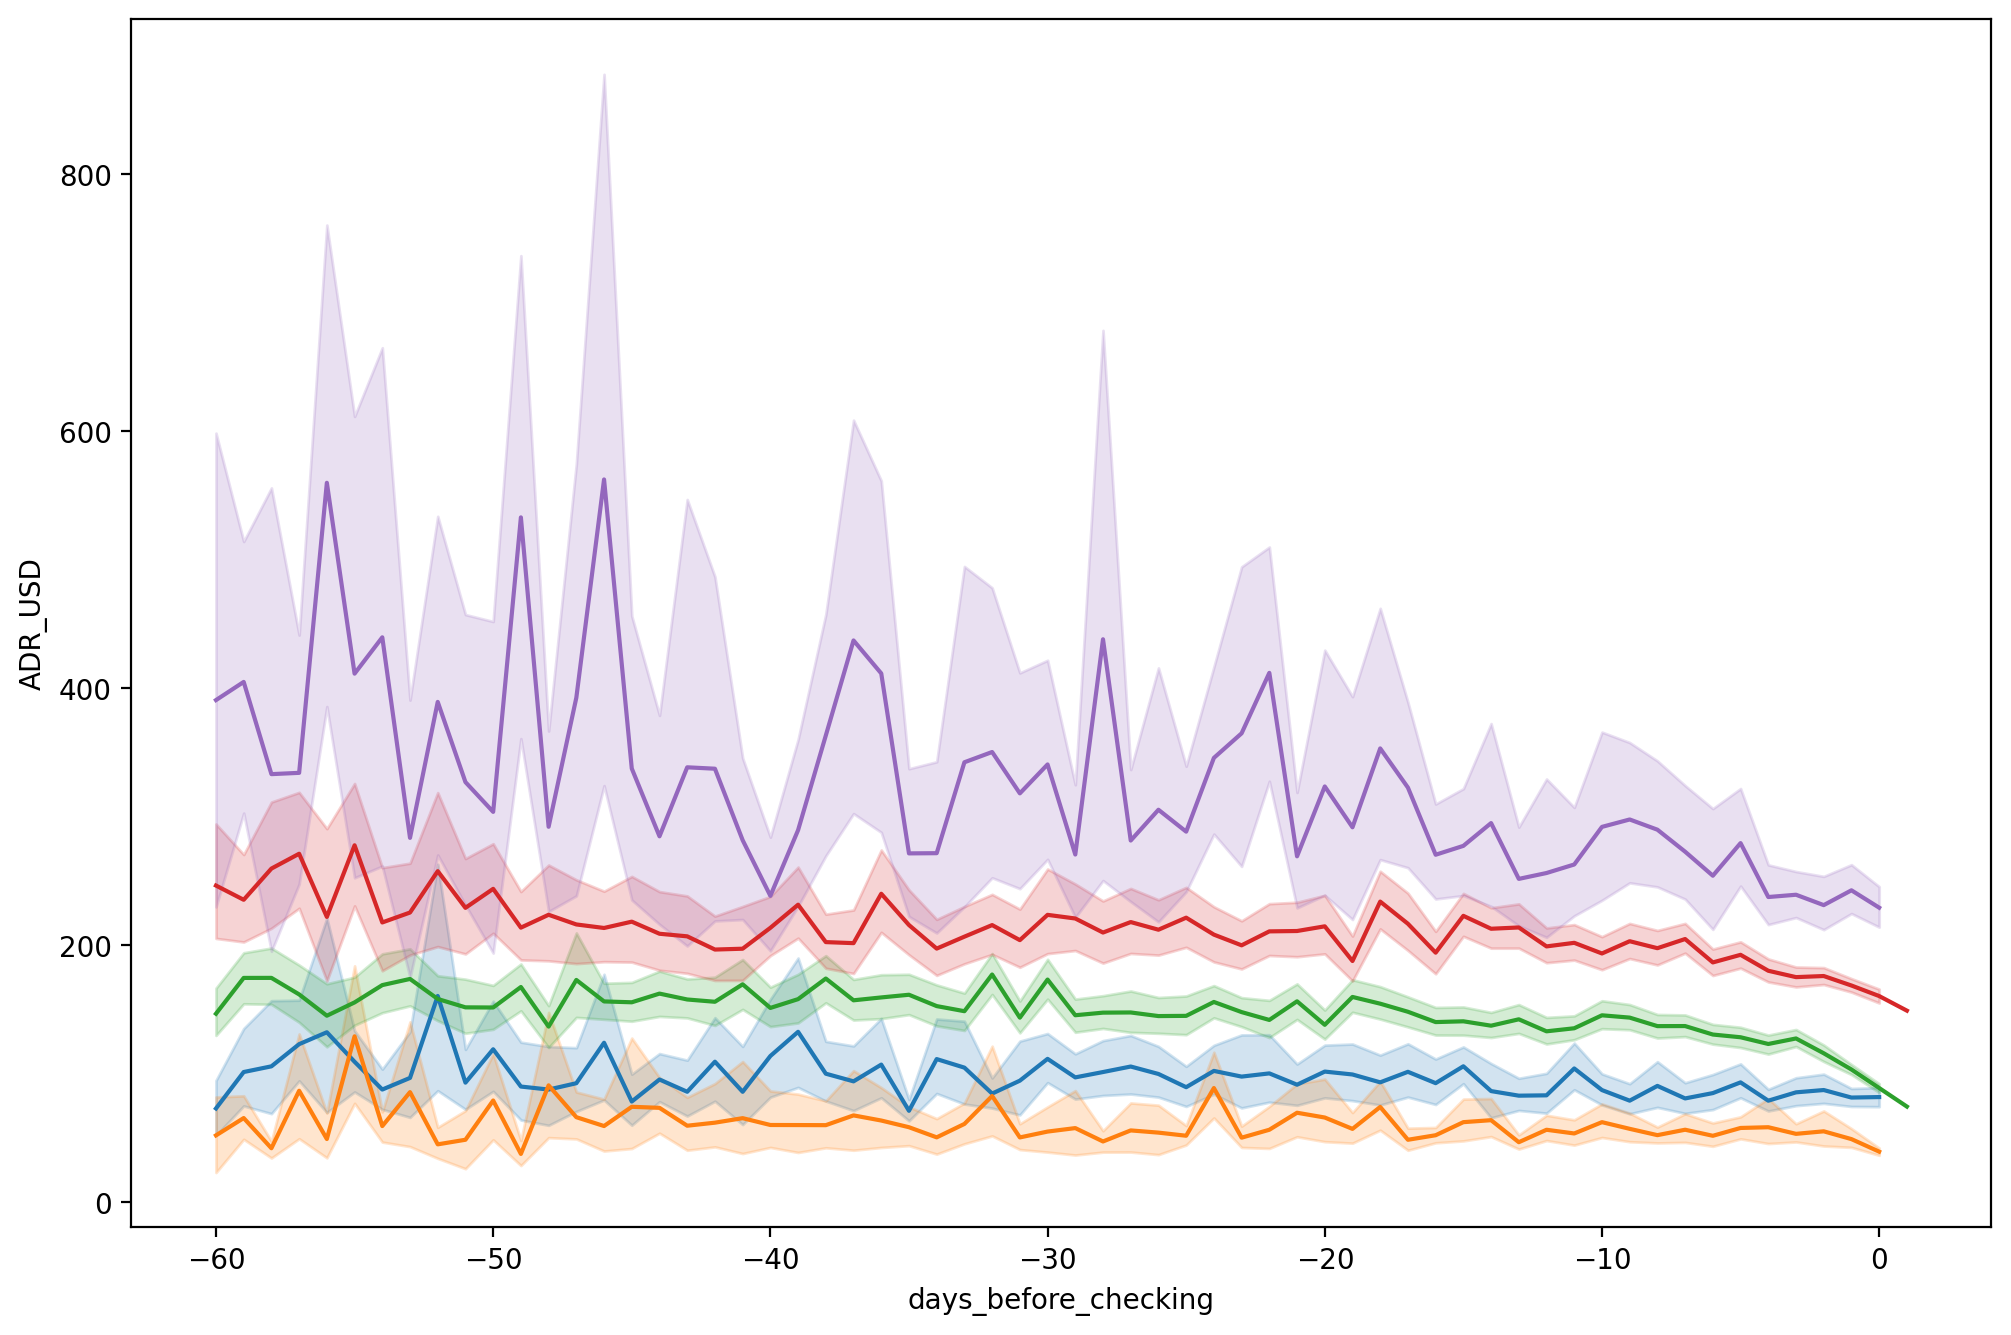

In [550]:
plt.figure(dpi=200,figsize=(12,8))

sns.lineplot(data=dfall[dfall['star_rating']==1.0],x=dfall['days_before_checking']*(-1),y='ADR_USD')
#sns.lineplot(data=adfA[adfA['star_rating']==1.5],x=adfA['days_before_checking']*(-1),y='ADR_USD')
sns.lineplot(data=dfall[dfall['star_rating']==2.0],x=dfall['days_before_checking']*(-1),y='ADR_USD')
#sns.lineplot(data=adfA[adfA['star_rating']==2.5],x=adfA['days_before_checking']*(-1),y='ADR_USD')
sns.lineplot(data=dfall[dfall['star_rating']==3.0],x=dfall['days_before_checking']*(-1),y='ADR_USD')
#sns.lineplot(data=adfA[adfA['star_rating']==3.5],x=adfA['days_before_checking']*(-1),y='ADR_USD')
sns.lineplot(data=dfall[dfall['star_rating']==4.0],x=dfall['days_before_checking']*(-1),y='ADR_USD')
#sns.lineplot(data=adfA[adfA['star_rating']==4.5],x=adfA['days_before_checking']*(-1),y='ADR_USD')
sns.lineplot(data=dfall[dfall['star_rating']==5.0],x=dfall['days_before_checking']*(-1),y='ADR_USD')

In [554]:
dfall.head()

#  ADR_USD  hotel_id  city_id  star_rating accommodation_type_name  \
0  1    71.06    297388     9395          2.5                   Hotel   
1  2    76.56    298322     9395          3.0                   Hotel   
2  3   153.88   2313076     9395          5.0                   Hotel   
3  4   126.60   2240838     9395          3.5                   Hotel   
4  5   115.08   2240838     9395          3.5                   Hotel   

  chain_hotel booking_date checkin_date checkout_date  days_before_checking  \
0   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
1   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
2       chain   2016-08-02   2016-10-01    2016-10-02                    60   
3   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   
4   non-chain   2016-08-04   2016-10-02    2016-10-03                    59   

   days_booked  
0            1  
1            1  
2            1  
3            1  
4            1

In [555]:
dfall2 = dfall.groupby('days_before_checking').count().reset_index()#[('days_before_checking','chain_hotel'),axis=1]
dfall2 = dfall2[['days_before_checking','ADR_USD']]


In [631]:
dfall2.columns = ['days_before_checking', 'bookings']
#cca = 100*dfall2['chain_hotel']/dfall2['chain_hotel'].sum()
#cc[::-1].cumsum()
dfall2['percentage']=(100*dfall2['bookings']/dfall2['bookings'].sum())[::-1].cumsum()

C:\Users\User\AppData\Local\Temp\ipykernel_10192\4213221165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfall2['percentage']=(100*dfall2['bookings']/dfall2['bookings'].sum())[::-1].cumsum()


In [632]:
dfall2

days_before_checking  bookings  percentage
0                     -1         3  100.000000
1                      0      5603   99.993886
2                      1      5666   88.574107
3                      2      2962   77.025925
4                      3      2430   70.988912
..                   ...       ...         ...
57                    56       180    1.938285
58                    57       215    1.571417
59                    58       183    1.133214
60                    59       184    0.760232
61                    60       189    0.385211

[62 rows x 3 columns]

<AxesSubplot:xlabel='days_before_checking', ylabel='chain_hotel'>

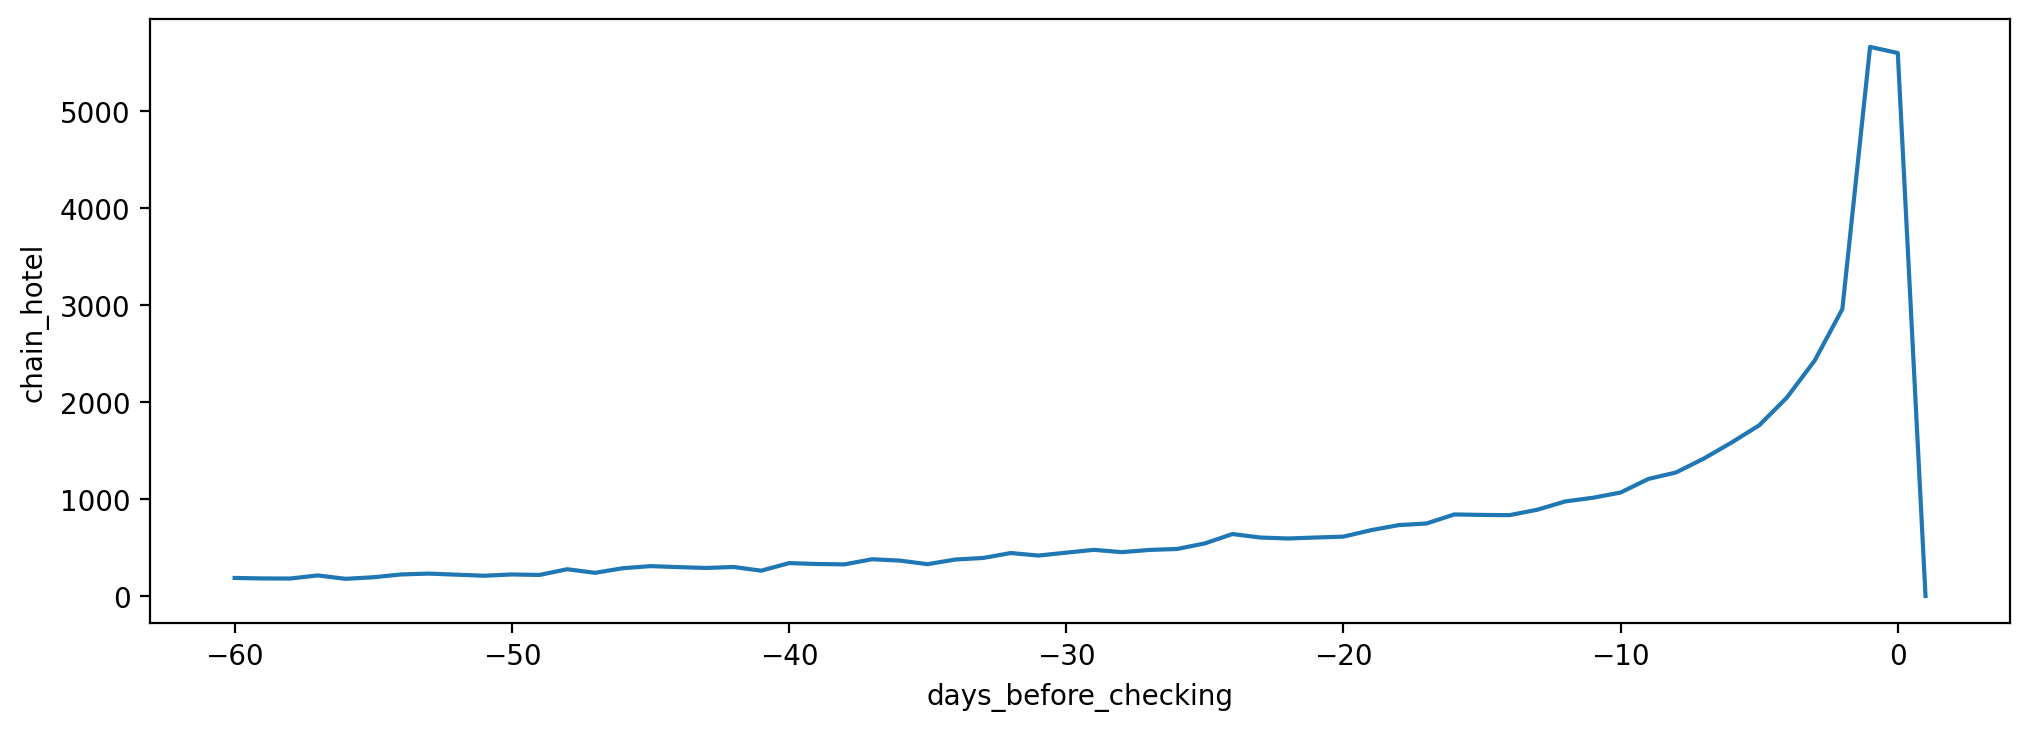

In [558]:
plt.figure(dpi=200,figsize=(12,4))
sns.lineplot(data = dfall2, x= dfall2['days_before_checking']*(-1),y='chain_hotel')

In [559]:
cca = 100*dfall2['chain_hotel']/dfall2['chain_hotel'].sum()
#cc[::-1].cumsum()
dfall2['percentage2']=cca[::-1].cumsum()

<AxesSubplot:xlabel='days_before_checking', ylabel='percentage2'>

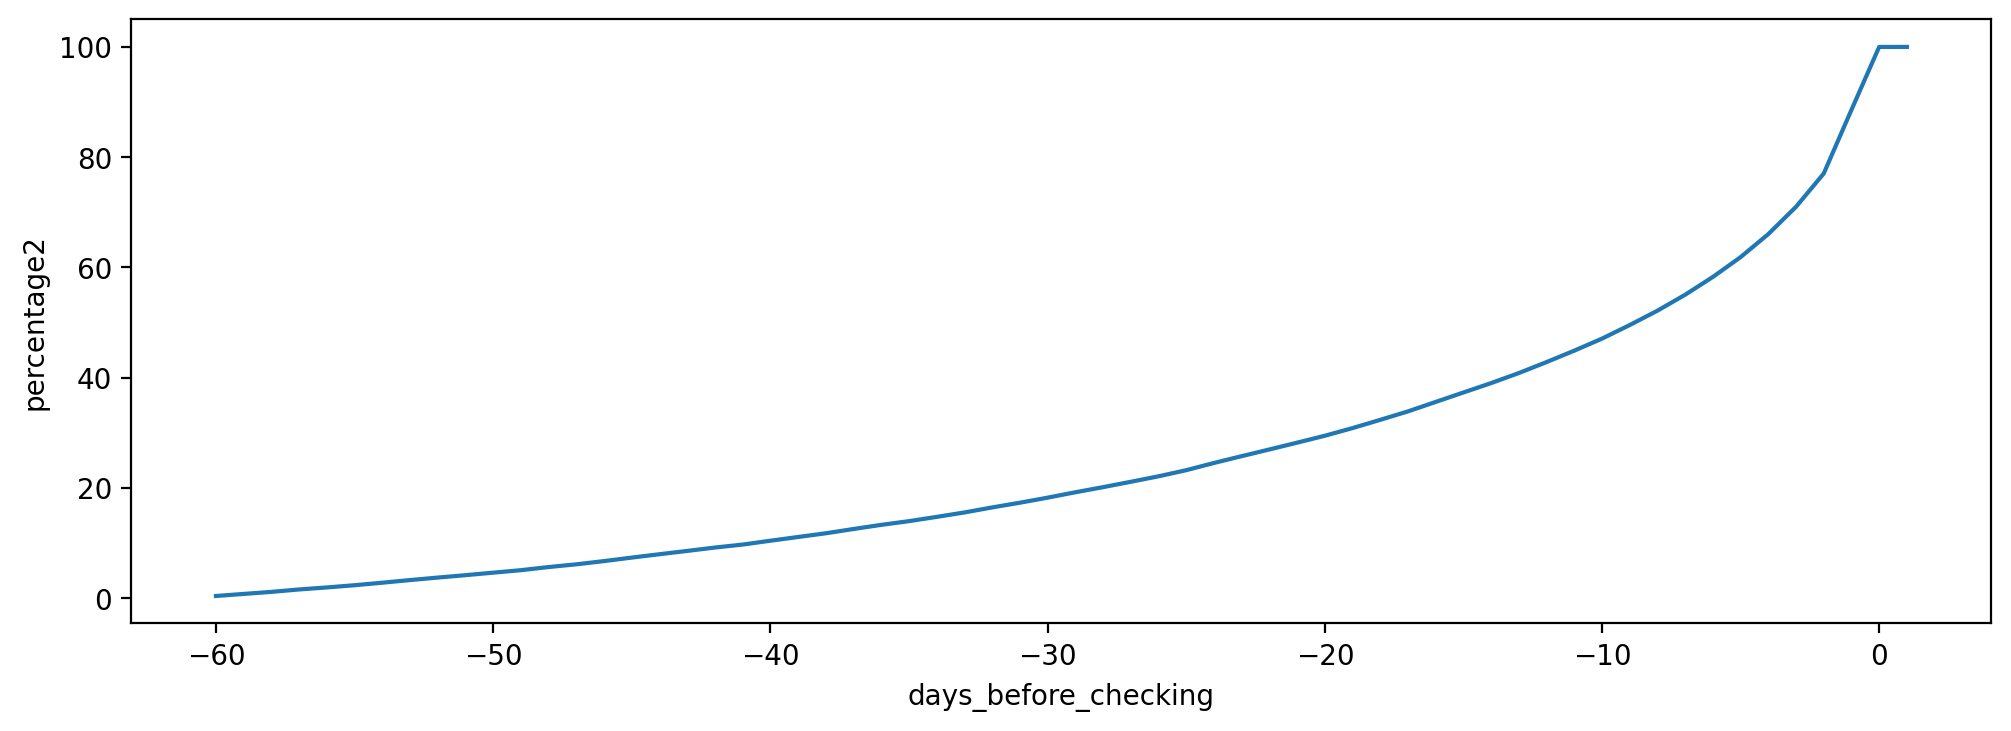

In [561]:
plt.figure(dpi=200,figsize=(12,4))
sns.lineplot(data = dfall2, x= dfall2['days_before_checking']*(-1),y='percentage2')

## 2 - 40% are yet to book 1 week to check in date

In [634]:
dfall2['percentage'][:10]

0    100.000000
1     99.993886
2     88.574107
3     77.025925
4     70.988912
5     66.036198
6     61.857981
7     58.264715
8     55.034241
9     52.140062
Name: percentage, dtype: float64

3rd point about revenue?

In [568]:
# ADD calculations revenue

In [ ]:
# Histogram (with subplots) showing the distribution of tenure against Contract and Churn

plt.figure(dpi=200)
sns.displot(data=df,x='tenure',bins=50,col='Contract',row='Churn',kde=True)
plt.show;

In [ ]:
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue ='Churn')


<Figure size 1200x800 with 0 Axes>

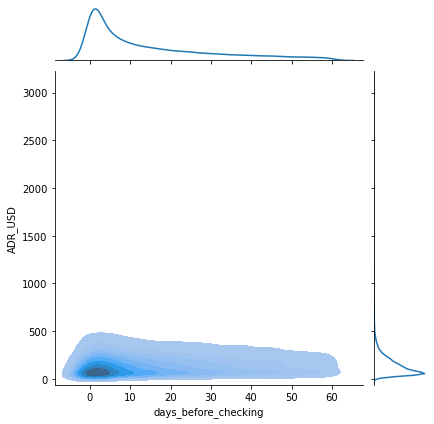

In [581]:
plt.figure(dpi=200)
sns.jointplot(data=dfall,x='days_before_checking',y='ADR_USD',kind='kde',shade=True)

C:\Users\User\anaconda3\envs\data_science_machine_learning\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\envs\data_science_machine_learning\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\envs\data_science_machine_learning\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\envs\data_science_machine_learning\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\envs\data_science_machine_learning\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warning

<Figure size 1200x800 with 0 Axes>

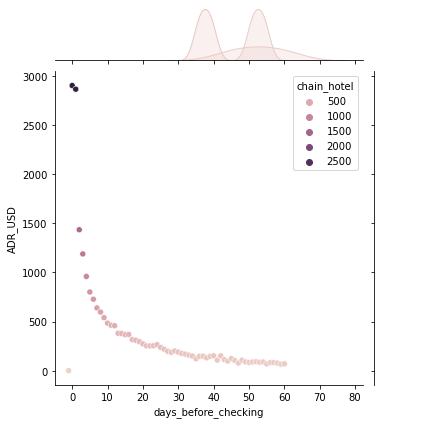

In [582]:
plt.figure(dpi=200)
sns.jointplot(data=df,x='days_before_checking',y='ADR_USD',kind='scatter'
             ,hue='chain_hotel')

###  Predicting Price

In [580]:
#IMPORT MODELS

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#IMPORT PERF METRICS

from sklearn.preprocessing import tests
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,plot_roc_curve,mean_absolute_error,mean_squared_error

In [589]:
dfall.head(2)

#  ADR_USD  hotel_id  city_id  star_rating accommodation_type_name  \
0  1    71.06    297388     9395          2.5                   Hotel   
1  2    76.56    298322     9395          3.0                   Hotel   

  chain_hotel booking_date checkin_date checkout_date  days_before_checking  \
0   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   
1   non-chain   2016-08-02   2016-10-01    2016-10-02                    60   

   days_booked  
0            1  
1            1

In [596]:
dfallmod= dfall.drop(['chain_hotel','accommodation_type_name','booking_date','checkin_date','checkout_date'],axis=1)#.drop()

X = dfallmod.drop('ADR_USD',axis=1)
y = dfallmod['ADR_USD']

In [612]:
X.head()

#  hotel_id  city_id  star_rating  days_before_checking  days_booked
0  1    297388     9395          2.5                    60            1
1  2    298322     9395          3.0                    60            1
2  3   2313076     9395          5.0                    60            1
3  4   2240838     9395          3.5                    59            1
4  5   2240838     9395          3.5                    59            1

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [599]:
lmodel = LinearRegression()

In [600]:
lmodel.fit(X_train,y_train)

LinearRegression()

In [601]:
ypreds = lmodel.predict(X_test)

In [602]:
y_test

31393     43.800000
23121     20.100000
25879     77.920000
25547    123.100000
48155    393.220000
            ...    
31390     37.140000
28109     39.340000
20647    159.920000
30804    254.000000
35102    230.633333
Name: ADR_USD, Length: 14720, dtype: float64

In [603]:
mean_absolute_error(ypreds,y_test)

76.27121963417915

In [604]:
np.sqrt(mean_squared_error(ypreds,y_test))

124.5511775024363

In [613]:
y_test.mean()

148.84764887152787

In [ ]:
lmodel.predict([[0.564,0.522,0.894]])

In [609]:
#ypreds = model.predict(X_test)
#print(classification_report(y_test,ypreds))
#print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
#plot_confusion_matrix(lmodel,X_test,y_test)